<a href="https://colab.research.google.com/github/ParhamPishro/Flavonoid/blob/main/Flavonoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.formula.api import ols, mixedlm
from scipy import stats
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import chisquare
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE
from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler , LabelEncoder#, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict, cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from keras.models import Sequential
from keras import layers


from sklearn.metrics import mean_absolute_error, r2_score, get_scorer_names, pairwise, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
#from sklearn.feature_selection import chi2, RFE, RFECV, SelectKBest


In [ ]:
df = pd.read_excel("/content/FlavonoidData.xlsx")
df

authors flavonoid cell line  time   dose  viability-mean  \
0    Chen et al. 2017  Luteolin    KYSE30    48   10.0       77.272727   
1    Chen et al. 2017  Luteolin    KYSE30    48   20.0       67.613636   
2    Chen et al. 2017  Luteolin    KYSE30    48   40.0       47.159091   
3    Chen et al. 2017  Luteolin    KYSE30    48   80.0       32.386364   
4    Chen et al. 2017  Luteolin    KYSE30    72   10.0       69.886364   
..                ...       ...       ...   ...    ...             ...   
479   Zhu et al. 2016  Apigenin   KYSE150    24   20.0       88.407643   
480   Zhu et al. 2016  Apigenin   KYSE150    24   40.0       78.980892   
481   Zhu et al. 2016  Apigenin   KYSE150    24   60.0       67.261146   
482   Zhu et al. 2016  Apigenin   KYSE150    24   80.0       45.350318   
483   Zhu et al. 2016  Apigenin   KYSE150    24  100.0       39.490446   

     viability-error  viability-SD  viability-SE  
0          77.272727      0.001000           NaN  
1          67.613636      0.001000           NaN  
2          47.159091      0.001000           NaN  
3          32.386364      0.001000           NaN  
4          69.886364      0.001000           NaN  
..               ...           ...           ...  
479        88.407643      0.001000           NaN  
480        82.802548      3.821656           NaN  
481        70.828025      3.566879           NaN  
482        47.643312      2.292994           NaN  
483        41.528662      2.038217           NaN  

[484 rows x 9 columns]

In [ ]:
test = pd.read_excel("/content/FlavonoidTest.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/FlavonoidTest.xlsx'

In [ ]:
df = pd.read_excel("/content/TrainTest.xlsx")

In [ ]:
df[:][df['viability-error']==100]#[df['authors']=='Xin 2008']

Empty DataFrame
Columns: [authors, flavonoid, cell line, time, dose, viability-mean, viability-error, viability-SD, viability-SE]
Index: []

In [ ]:
df[['authors', 'viability-mean']].groupby(['authors']).size()

authors
Chen et al. 2017          16
Chen et al. 2021          24
Guo et al. 2022            4
Jia et al. 2021           18
Li et al. 2023             8
Qiao et al. 2018          18
Qin et al. 2021           24
Qiu et al. 2019            5
Ren et al. 2016            7
Wang and Renquan 2023     18
Wang and Zheng 2016       15
Wang et al. 2011          46
Wang et al. 2011 (2)      43
Wang et al. 2018          30
Xie et al 2018             9
Xin 2008                 137
Yao et al. 2016            8
Zang et al. 2014           6
Zhang et al. 2008         71
Zhang et al. 2009         67
Zhang et al. 2021          8
Zhu et al. 2016            5
dtype: int64

In [ ]:
ave_study = np.array([50.827482, 62.679968,	81.115314,	61.811623,	62.875710, 67.296273,	50.953734,	47.444444,	63.081633,	56.603119, 76.928278,
                      58.377563, 67.944333,	86.615642,	51.716115,	54.836807, 71.892943,	62.511155,	63.950430,	45.981116,	38.174020, 63.898089])
authors = ['Chen et al. 2017', 'Chen et al. 2021', 'Guo et al. 2022', 'Jia et al. 2021', 'Li et al. 2023', 'Qiao et al. 2018',
           'Qin et al. 2021', 'Qiu et al. 2019', 'Ren et al. 2016', 'Wang and Renquan 2023', 'Wang and Zheng 2016', 'Wang et al. 2011',
           'Wang et al. 2011 (2)', 'Wang et al. 2018', 'Xie et al 2018', 'Xin 2008', 'Yao et al. 2016', 'Zang et al. 2014',
           'Zhang et al. 2008', 'Zhang et al. 2009', 'Zhang et al. 2021', 'Zhu et al. 2016']

In [ ]:
sum((df['viability-mean'][df['authors']=='Xin 2008']-59)**2)

67508.28457304541

In [ ]:
authors[0]

'Chen et al. 2017'

In [ ]:
SSB = 0
SSW = 0

for ave in ave_study:
  SSB = 22 * (ave - 59.494499)**2 + SSB

for i in range(22):
  SSW = sum((df['viability-mean'][df['authors']==authors[i]]-ave_study[i])**2) + SSW

MSB = SSB / 21
MSW = SSW / 565

ICC = (MSB-MSW) / ((MSW*25.6818)+MSB)
print(ICC)

0.1980160723249698


In [ ]:
SSB

np.float64(63873.70014185115)

In [ ]:
df.describe().T

count       mean        std        min        25%        50%  \
time             587.0  50.044293  19.370769  24.000000  24.000000  48.000000   
dose             587.0  37.968739  32.586802   1.000000  10.000000  25.000000   
viability-mean   587.0  59.494499  22.081421   1.714286  45.522972  63.243243   
viability-error  587.0  63.200905  22.934850   1.714286  48.958231  67.162562   
viability-SD     587.0   3.703093   3.022448   0.001000   1.737096   3.010753   
viability-SE     189.0   3.176975   2.646373   0.001000   1.405152   2.621359   

                       75%         max  
time             72.000000   96.000000  
dose             50.000000  300.000000  
viability-mean   76.798508  100.000000  
viability-error  81.843802  100.000000  
viability-SD      5.071429   19.245283  
viability-SE      3.881402   17.142857

## DataFrame

In [ ]:
df['v01'] = 1
df.loc[df['viability-mean']>50, 'v01'] = 0

test['v01'] = 1
test.loc[test['viability-mean']>50, 'v01'] = 0

In [ ]:
df['v01'].value_counts(sort = True)


v01
0    298
1    186
Name: count, dtype: int64

In [ ]:
df = df.drop(['authors', 'viability-error', 'viability-SD', 'viability-SE'], axis=1)
df

flavonoid cell line  time   dose  viability-mean  v01
0    Luteolin    KYSE30    48   10.0       77.272727    0
1    Luteolin    KYSE30    48   20.0       67.613636    0
2    Luteolin    KYSE30    48   40.0       47.159091    1
3    Luteolin    KYSE30    48   80.0       32.386364    1
4    Luteolin    KYSE30    72   10.0       69.886364    0
..        ...       ...   ...    ...             ...  ...
479  Apigenin   KYSE150    24   20.0       88.407643    0
480  Apigenin   KYSE150    24   40.0       78.980892    0
481  Apigenin   KYSE150    24   60.0       67.261146    0
482  Apigenin   KYSE150    24   80.0       45.350318    1
483  Apigenin   KYSE150    24  100.0       39.490446    1

[484 rows x 6 columns]

In [ ]:
df.describe().T

count       mean        std        min        25%       50%  \
time            484.0  50.330579  19.053977  24.000000  24.000000  48.00000   
dose            484.0  41.383264  33.629117   1.000000  20.000000  40.00000   
viability-mean  484.0  57.088105  21.670983   1.714286  44.279525  61.07748   
v01             484.0   0.384298   0.486932   0.000000   0.000000   0.00000   

                      75%         max  
time            72.000000   72.000000  
dose            63.750000  300.000000  
viability-mean  73.846554   95.769231  
v01              1.000000    1.000000

In [ ]:
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded

time   dose  viability-mean  v01  flavonoid_Acacetin  flavonoid_Apigenin  \
0      48   10.0       77.272727    0                   0                   0   
1      48   20.0       67.613636    0                   0                   0   
2      48   40.0       47.159091    1                   0                   0   
3      48   80.0       32.386364    1                   0                   0   
4      72   10.0       69.886364    0                   0                   0   
..    ...    ...             ...  ...                 ...                 ...   
479    24   20.0       88.407643    0                   0                   1   
480    24   40.0       78.980892    0                   0                   1   
481    24   60.0       67.261146    0                   0                   1   
482    24   80.0       45.350318    1                   0                   1   
483    24  100.0       39.490446    1                   0                   1   

     flavonoid_Chrysin  flavonoid_Galangin  flavonoid_Kaempferol  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    0                   0                     0   
3                    0                   0                     0   
4                    0                   0                     0   
..                 ...                 ...                   ...   
479                  0                   0                     0   
480                  0                   0                     0   
481                  0                   0                     0   
482                  0                   0                     0   
483                  0                   0                     0   

     flavonoid_Luteolin  ...  cell line_KYSE150  cell line_KYSE30  \
0                     1  ...                  0                 1   
1                     1  ...                  0                 1   
2                     1  ...                  0                 1   
3                     1  ...                  0                 1   
4                     1  ...                  0                 1   
..                  ...  ...                ...               ...   
479                   0  ...                  1                 0   
480                   0  ...                  1                 0   
481                   0  ...                  1                 0   
482                   0  ...                  1                 0   
483                   0  ...                  1                 0   

     cell line_KYSE410  cell line_KYSE450  cell line_KYSE510  cell line_OE19  \
0                    0                  0                  0               0   
1                    0                  0                  0               0   
2                    0                  0                  0               0   
3                    0                  0                  0               0   
4                    0                  0                  0               0   
..                 ...                ...                ...             ...   
479                  0                  0                  0               0   
480                  0                  0                  0               0   
481                  0                  0                  0               0   
482                  0                  0                  0               0   
483                  0                  0                  0               0   

     cell line_OE33  cell line_TE-1  cell line_TE-10  cell line_YES2  
0                 0               0                0               0  
1                 0               0                0               0  
2                 0               0                0               0  
3                 0               0                0               0  
4                 0               0                0               0  

In [ ]:
#df_encoded
X = df_encoded.drop(['viability-mean', 'v01'], axis=1)
y = df['viability-mean']
y01 = df['v01']

X_test = test.drop(['authors', 'flavonoid', 'cell line', 'viability-mean', 'v01'], axis=1)
y_test = test['v01']

## Data Visualization

([<matplotlib.patches.Wedge at 0x7adaf8e9af10>,
 [Text(-1.0281278765071942, -0.39109214968956846, 'Over 50%'),
  Text(1.1215941115204953, 0.4266458121235349, 'Under 50%')],
 [Text(-0.5607970235493785, -0.2133229907397646, '61.57%'),
  Text(0.6542632317202889, 0.24887672373872868, '38.43%')])

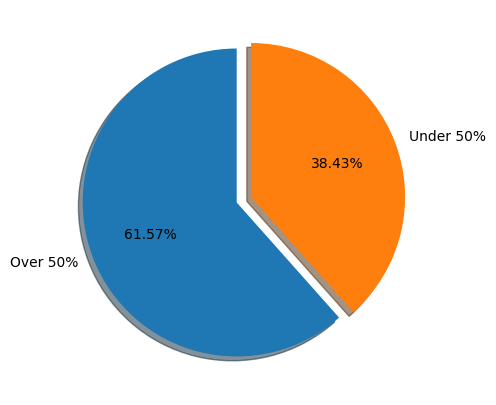

In [ ]:
# Data to plot
sizes = df['v01'].value_counts(sort = True)

rcParams['figure.figsize'] = 5,5 # Plot

plt.pie(sizes, explode = (0,0.1), labels=["Over 50%", "Under 50%"], autopct='%.2f%%', shadow=True, startangle=90)#, colors=plt.cm.tab10.colors)

#plt.title('Percentage of Viability in Dataset')

<Axes: >

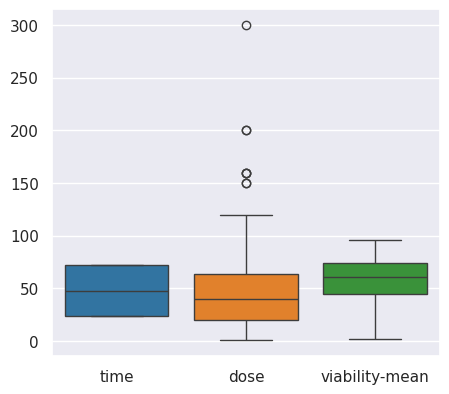

In [ ]:
sns.set_theme(rc={'figure.figsize':(5,4.5)})
sns.boxplot(df[['time', 'dose', 'viability-mean']], palette=plt.cm.tab10.colors)

In [ ]:
df['flavonoid'].value_counts()

flavonoid
Chrysin       92
Luteolin      88
Kaempferol    75
Apigenin      69
Quercetin     56
Myricetin     47
Galangin      39
Acacetin      18
Name: count, dtype: int64

In [ ]:
flavonoid_count = df['flavonoid'].value_counts()
cell_line_count = df['cell line'].value_counts()

flavonoid_labels = ["Chrysin", "Luteolin", "Kaempferol", "Apigenin", "Quercetin", "Myricetin", "Galangin",
                    "Acacetin"] #"Baicalein", "Cirsiliol", "Casticin",
cell_line_labels = ["OE 33", "KYSE 510", "TE-1", "KYSE 30", "KYSE 150", "KYSE 450", 'TE-10',
                    "OE 19", "YES 2", "KYSE 410"]


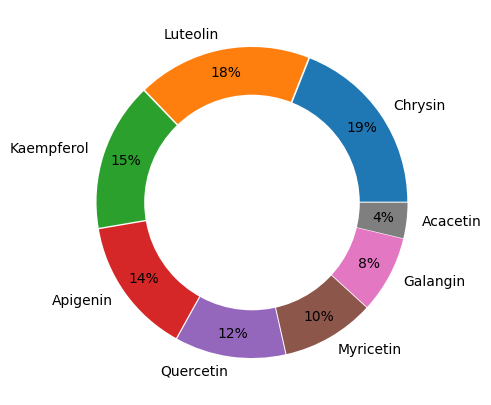

In [ ]:
# explosion
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Pie Chart
plt.pie(flavonoid_count, labels=flavonoid_labels, autopct='%1.0f%%', pctdistance=0.85, explode=explode, colors=plt.cm.tab10.colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
#plt.title('Flavonoids')

# Displaying Chart
plt.show()


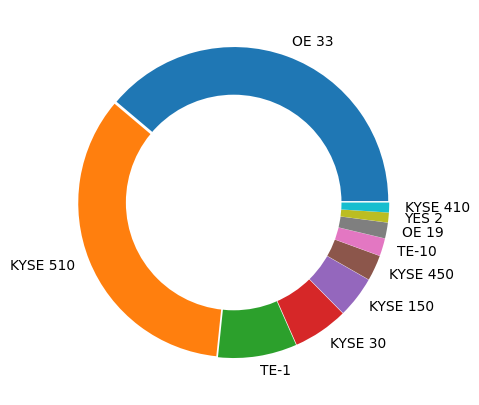

In [ ]:
# explosion
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Pie Chart
plt.pie(cell_line_count, labels=cell_line_labels, pctdistance=0.85, explode=explode, colors=plt.cm.tab10.colors) #autopct='%1.1f%%'

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
#plt.title('Cell Lines')

# Displaying Chart
plt.show()


In [ ]:
aca = df['flavonoid']=='Acacetin'
api = df['flavonoid']=='Apigenin'
chr = df['flavonoid']=='Chrysin'
gal = df['flavonoid']=='Galangin'
kae = df['flavonoid']=='Kaempferol'
lut = df['flavonoid']=='Luteolin'
myr = df['flavonoid']=='Myricetin'
que = df['flavonoid']=='Quercetin'


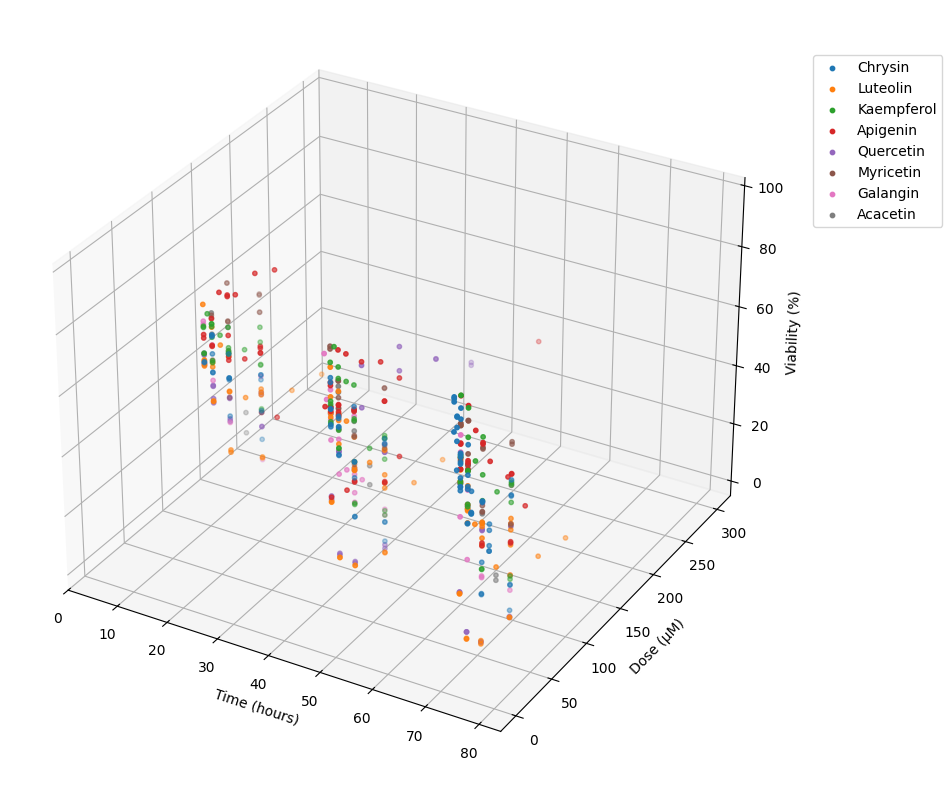

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10,10))
ax3D = fig.add_subplot(111, projection='3d')

p3d = ax3D.scatter(df['time'][chr], df['dose'][chr], df['viability-mean'][chr], s=10, color=plt.cm.tab10.colors[0])
p3d = ax3D.scatter(df['time'][lut], df['dose'][lut], df['viability-mean'][lut], s=10, color=plt.cm.tab10.colors[1])
p3d = ax3D.scatter(df['time'][kae], df['dose'][kae], df['viability-mean'][kae], s=10, color=plt.cm.tab10.colors[2])
p3d = ax3D.scatter(df['time'][api], df['dose'][api], df['viability-mean'][api], s=10, color=plt.cm.tab10.colors[3])
p3d = ax3D.scatter(df['time'][que], df['dose'][que], df['viability-mean'][que], s=10, color=plt.cm.tab10.colors[4])
p3d = ax3D.scatter(df['time'][myr], df['dose'][myr], df['viability-mean'][myr], s=10, color=plt.cm.tab10.colors[5])
p3d = ax3D.scatter(df['time'][gal], df['dose'][gal], df['viability-mean'][gal], s=10, color=plt.cm.tab10.colors[6])
p3d = ax3D.scatter(df['time'][aca], df['dose'][aca], df['viability-mean'][aca], s=10, color=plt.cm.tab10.colors[7])

ax3D.set_xlabel('Time (hours)')
ax3D.set_ylabel('Dose (μM)')
ax3D.set_zlabel('Viability (%)')

ax3D.set_xbound(lower=0, upper=84)
ax3D.set_xbound()

#ax3D.set_title('3D Plot of Flavonoids')
ax3D.legend(flavonoid_labels, bbox_to_anchor=(1.22, 0.95))

plt.show()

## Hyperparameter Tuning

In [ ]:
#initialize

knc = KNeighborsClassifier()
svc = SVC()
lor = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


### KNN

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

CPU times: user 12.2 s, sys: 35.9 ms, total: 12.2 s
Wall time: 12.3 s
{'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'distance'}
0.9112113402061854


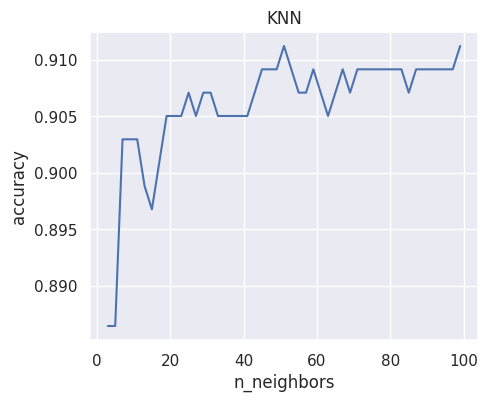

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['distance'],
            'metric': ['euclidean']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X, y01)

plt.figure(figsize=(5, 4))
plt.plot(range(3, 100, 2), gs_kn.cv_results_['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN')
#plt.ylim(.83, .87)

plt.show()

In [ ]:
param_kn = {'n_neighbors': [51],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X, y01)
print(gs_kn.cv_results_['params'][0:2], gs_kn.cv_results_['mean_test_score'][0:2].max())
print(gs_kn.cv_results_['params'][2:4], gs_kn.cv_results_['mean_test_score'][2:4].max())
print(gs_kn.cv_results_['params'][4:6], gs_kn.cv_results_['mean_test_score'][4:6].max())
print(gs_kn.cv_results_['params'][0:5:2], gs_kn.cv_results_['mean_test_score'][0:5:2].max())
print(gs_kn.cv_results_['params'][1:6:2], gs_kn.cv_results_['mean_test_score'][1:6:2].max())


[{'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'distance'}] 0.9112113402061854
[{'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'uniform'}, {'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'distance'}] 0.9070876288659793
[{'metric': 'minkowski', 'n_neighbors': 51, 'weights': 'uniform'}, {'metric': 'minkowski', 'n_neighbors': 51, 'weights': 'distance'}] 0.9112113402061854
[{'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'uniform'}, {'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'uniform'}, {'metric': 'minkowski', 'n_neighbors': 51, 'weights': 'uniform'}] 0.7995919243986254
[{'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'distance'}, {'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'distance'}, {'metric': 'minkowski', 'n_neighbors': 51, 'weights': 'distance'}] 0.9112113402061854


### LR

In [ ]:
param_lo = {'penalty': ['l1', 'l2'],
            'C': [2**_ for _ in range(-15,11)],
            'solver': ['liblinear']}

gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 2.14 s, sys: 7.36 ms, total: 2.14 s
Wall time: 2.14 s
{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
0.820360824742268


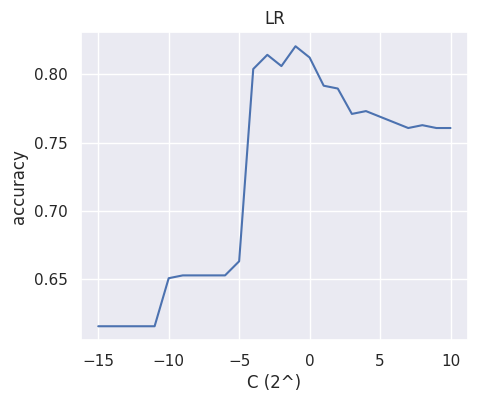

In [ ]:
param_lo = {'C': [2**_ for _ in range(-15,11)],
            'penalty': ['l1'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X, y01)

plt.figure(figsize=(5, 4))
plt.plot(range(-15,11), gs_lo.cv_results_['mean_test_score'])

plt.xlabel('C (2^)')
plt.ylabel('accuracy')
plt.title('LR')

plt.show()

In [ ]:
param_lo = {'C': [0.5],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X, y01)
print(gs_lo.cv_results_['mean_test_score'])

print(gs_lo.cv_results_['params'])

[0.82036082 0.78125   ]
[{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}, {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}]


In [ ]:
param_lo = {'penalty': [None],
            'max_iter': [1000]}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X, y01)
print(gs_lo.cv_results_['mean_test_score'])

print(gs_lo.cv_results_['params'])

[0.76473368]
[{'max_iter': 1000, 'penalty': None}]


### SVM

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': [2**_ for _ in range(-15,11)]}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

CPU times: user 4min 41s, sys: 139 ms, total: 4min 42s
Wall time: 4min 58s
{'C': 0.0625, 'kernel': 'linear'}
0.8285867697594502


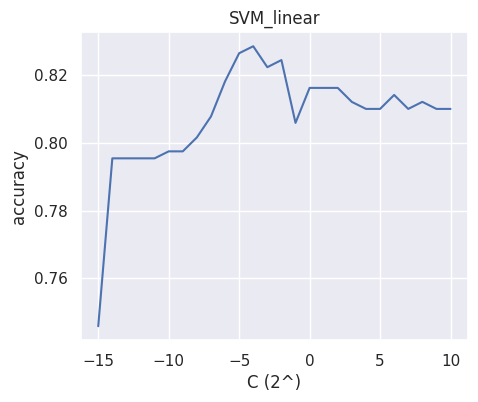

In [ ]:
plt.figure(figsize=(5, 4))

plt.plot(range(-15,11), gs_sv_l.cv_results_['mean_test_score'])

plt.xlabel('C (2^)')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,11)],
            'gamma': [2**_ for _ in range(-15,11)]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

CPU times: user 53.2 s, sys: 54.3 ms, total: 53.2 s
Wall time: 58.8 s
{'C': 1024, 'gamma': 0.015625, 'kernel': 'rbf'}
0.8926975945017182


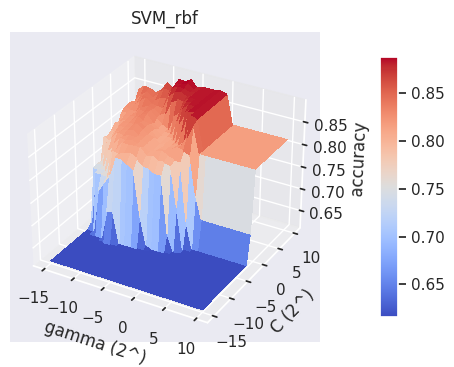

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(-15,11)
y_3d = range(-15,11)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_sv_r.cv_results_['mean_test_score'].reshape(26,26)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('gamma (2^)')
ax.set_ylabel('C (2^)')
ax.set_zlabel('accuracy')

plt.title('SVM_rbf')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.75, aspect=15, anchor=(1.0, 0.5))

plt.show()

### DT

In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [2]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)


CPU times: user 15.1 s, sys: 40.2 ms, total: 15.1 s
Wall time: 15.3 s
{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}
0.9029639175257731


CPU times: user 4.76 s, sys: 8.72 ms, total: 4.77 s
Wall time: 7.34 s
{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}
0.9029639175257731


Text(0.5, 1.0, 'DT')

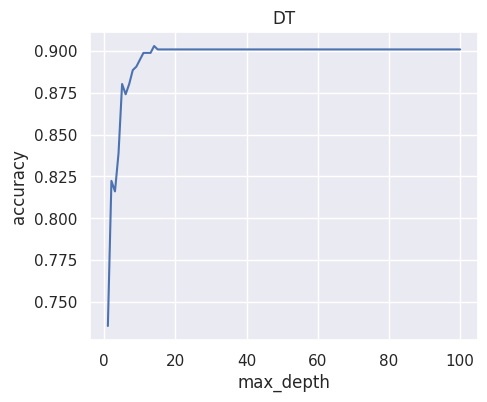

In [ ]:
param_dt = {'criterion': ['gini'],
         'splitter': ['best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [2]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)

plt.figure(figsize=(5, 4))
plt.plot(range(1, 101), gs_dt.cv_results_['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('DT')

In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': [14],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [2]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X, y01)

print(gs_dt.cv_results_['params'])
print(gs_dt.cv_results_['mean_test_score'])

CPU times: user 265 ms, sys: 850 µs, total: 266 ms
Wall time: 437 ms
[{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}]
[0.89059278 0.90296392 0.87199313 0.87199313]


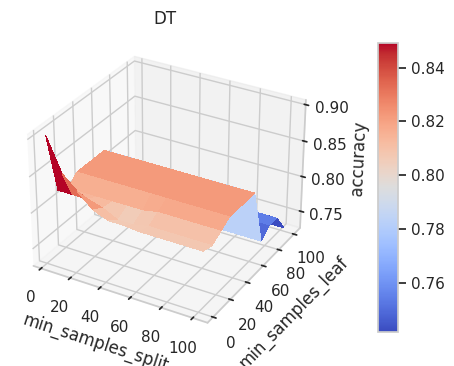

In [ ]:
param_dt = {'criterion': ['gini'],
         'splitter': ['best'],
         'max_depth': [14],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': range(1, 102, 10),
         'random_state': [2]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X, y01)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(2, 103, 10)
y_3d = range(1, 102, 10)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_dt.cv_results_['mean_test_score'].reshape(11,11)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('min_samples_split')
ax.set_ylabel('min_samples_leaf')
ax.set_zlabel('accuracy')

plt.title('DT')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.75, aspect=15, anchor=(1.0, 0.5))

plt.show()

### RF

In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 21),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [2]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X, y01)
print(gs_rf.best_params_)
print(gs_rf.best_score_)


CPU times: user 6min 54s, sys: 2.29 s, total: 6min 57s
Wall time: 7min 3s
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 2}
0.8906142611683849


In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': [11],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [2]}

rf_dt = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time rf_dt.fit(X, y01)

print(rf_dt.cv_results_['params'])
print(rf_dt.cv_results_['mean_test_score'])

CPU times: user 293 ms, sys: 1.97 ms, total: 295 ms
Wall time: 512 ms
[{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 2}, {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 2}]
[0.89061426 0.86585052]


CPU times: user 4.94 s, sys: 24.8 ms, total: 4.96 s
Wall time: 7.35 s


Text(0.5, 1.0, 'Random Forest')

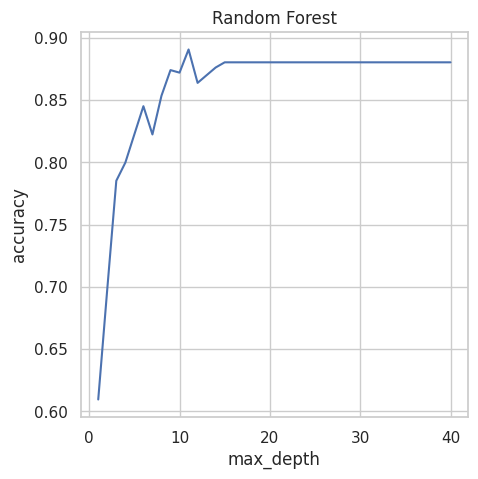

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': range(1, 41),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [2]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X, y01)

plt.plot(range(1, 41), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 11 s, sys: 62.8 ms, total: 11.1 s
Wall time: 11.3 s


Text(0.5, 1.0, 'Random Forest')

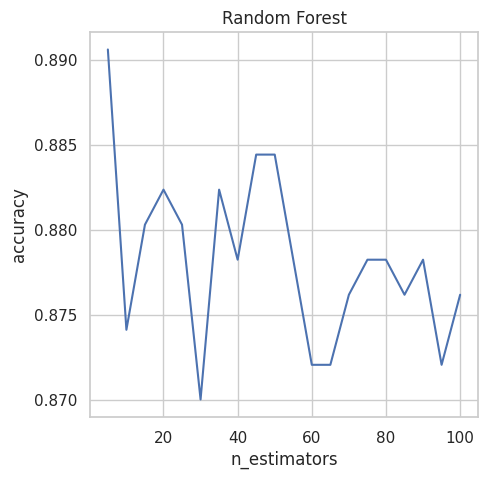

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [11],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [2]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X, y01)

plt.plot(range(5, 101, 5), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forest')



In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': range(1, 41),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [2]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X, y01)
print(gs_rf.best_params_)
print(gs_rf.best_score_)



CPU times: user 6min 16s, sys: 1.21 s, total: 6min 17s
Wall time: 6min 21s
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 2}
0.8906142611683849


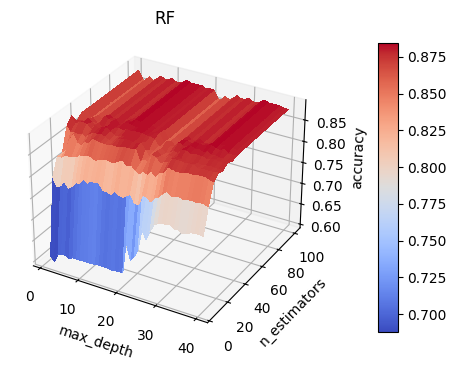

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(1, 41)
y_3d = range(5, 101, 5)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_rf.cv_results_['mean_test_score'].reshape(20,40)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('max_depth')
ax.set_ylabel('n_estimators')
ax.set_zlabel('accuracy')

plt.title('RF')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.75, aspect=15, anchor=(1.0, 0.5))

plt.show()

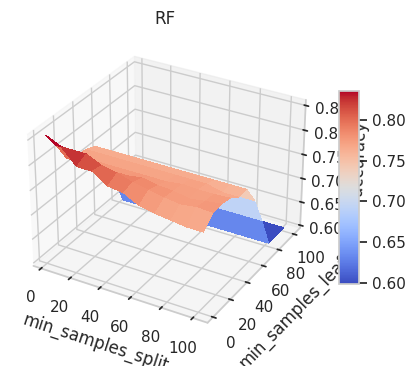

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [12],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': range(1, 102, 10),
         'n_estimators': [30],
         'random_state': [20]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
gs_rf.fit(X, y01)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(2, 103, 10)
y_3d = range(1, 102, 10)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_rf.cv_results_['mean_test_score'].reshape(11,11)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0.7, 0.9)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.1f}')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('min_samples_leaf')
ax.set_zlabel('accuracy')
#plt.xlabel('gamma')
#plt.ylabel('C')
#plt.zlabel('gamma')
plt.title('RF')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.5, aspect=10)

plt.show()

### Ada

In [ ]:
param_ad = {'n_estimators': range(5, 105, 5),
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000, 10000]}
gs_ad = GridSearchCV(ada, param_ad, cv=5, scoring='accuracy')
%time gs_ad.fit(X, y01)
print(gs_ad.best_params_)
print(gs_ad.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packa

CPU times: user 1min 20s, sys: 209 ms, total: 1min 20s
Wall time: 1min 39s
{'learning_rate': 1, 'n_estimators': 15}
0.863659793814433


CPU times: user 1min 2s, sys: 391 ms, total: 1min 2s
Wall time: 1min 3s

{'learning_rate': 1, 'n_estimators': 15}

0.863659793814433

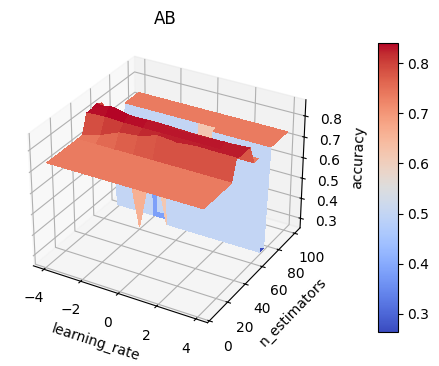

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(-4,5)
y_3d = range(5, 101, 5)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_ad.cv_results_['mean_test_score'].reshape(20,9)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('learning_rate')
ax.set_ylabel('n_estimators')
ax.set_zlabel('accuracy')

plt.title('AB')

fig.colorbar(surf, location='right', shrink=0.75, aspect=15, anchor=(1.0, 0.5))

plt.show()

### XGB

In [ ]:
param_xg = {'n_estimators': range(5, 105, 5),
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000, 10000]}
gs_xg = GridSearchCV(xgb, param_xg, cv=5, scoring='accuracy')
%time gs_xg.fit(X, y01)
print(gs_xg.best_params_)
print(gs_xg.best_score_)

CPU times: user 1min 10s, sys: 1.02 s, total: 1min 11s
Wall time: 52.6 s
{'learning_rate': 1, 'n_estimators': 10}
0.8967783505154638


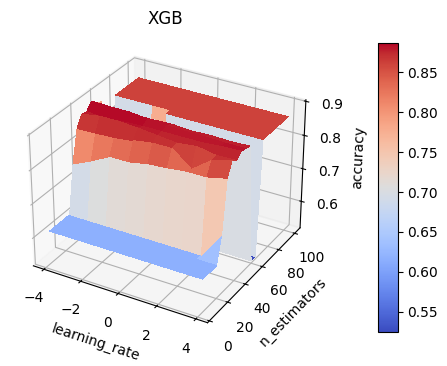

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_3d = range(-4,5)
y_3d = range(5, 101, 5)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = gs_xg.cv_results_['mean_test_score'].reshape(20,9)

# Plot the surface.
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('learning_rate')
ax.set_ylabel('n_estimators')
ax.set_zlabel('accuracy')

plt.title('XGB')

fig.colorbar(surf, location='right', shrink=0.75, aspect=15, anchor=(1.0, 0.5))

plt.show()

### MLP


In [ ]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(20,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,977 (74.13 KB)

 Trainable params: 18,977 (74.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y01, epochs=50, validation_split=0.25) #, batch_size=32, verbose=0, shuffle=False
print(model.evaluate(X, y01))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6538 - loss: 0.7202 - val_accuracy: 0.5702 - val_loss: 0.6232
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6467 - loss: 0.6042 - val_accuracy: 0.5785 - val_loss: 0.6735
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6737 - loss: 0.5885 - val_accuracy: 0.6612 - val_loss: 0.6601
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7317 - loss: 0.5053 - val_accuracy: 0.7851 - val_loss: 0.5462
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8253 - loss: 0.4461 - val_accuracy: 0.7934 - val_loss: 0.4991
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8240 - loss: 0.4327 - val_accuracy: 0.8017 - val_loss: 0.5054
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7972 - loss: 0.4573 - val_accuracy: 0.8017 - val_loss: 0.4596
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8060 - loss: 0.4333 - val_accuracy: 0.7851 - val_los

In [ ]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 512)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,761 (38.13 KB)

 Trainable params: 9,761 (38.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_simple, y01, epochs=50, validation_split=0.25) #, batch_size=32, verbose=0, shuffle=False
print(model.evaluate(X_simple, y01))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5876 - loss: 0.8744 - val_accuracy: 0.6364 - val_loss: 0.8177
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6503 - loss: 0.6785 - val_accuracy: 0.5702 - val_loss: 0.7853
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6567 - loss: 0.6607 - val_accuracy: 0.6529 - val_loss: 0.7076
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6924 - loss: 0.6130 - val_accuracy: 0.6529 - val_loss: 0.6022
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7195 - loss: 0.5731 - val_accuracy: 0.6033 - val_loss: 0.7116
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6805 - loss: 0.5844 - val_accuracy: 0.6446 - val_loss: 0.6275
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6887 - loss: 0.6041 - val_accuracy: 0.6529 - val_loss: 0.6334
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7229 - loss: 0.5256 - val_accuracy: 0.6612 - v

In [ ]:
mlp_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, mlp_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        85
           1       1.00      0.28      0.43        18

    accuracy                           0.87       103
   macro avg       0.93      0.64      0.68       103
weighted avg       0.89      0.87      0.84       103



## Final Model & Evaluation

In [ ]:
#initialize

knc = KNeighborsClassifier(metric='euclidean', n_neighbors=51, weights='distance')
lor = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
svc = SVC(C=2**10, gamma=0.015625, kernel='rbf')
dtc = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
rfc = RandomForestClassifier(criterion='gini', max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=2)
ada = AdaBoostClassifier(learning_rate=1, n_estimators=15)
xgb = XGBClassifier(learning_rate=1, n_estimators=10)

kf = KFold(n_splits=5, shuffle=False)


In [ ]:
kf_knc = cross_val_score(knc, X, y01, cv=kf, scoring='accuracy')
print(kf_knc.mean(), kf_knc.std())

0.902942439862543 0.06534069960291367


In [ ]:
kf_lor = cross_val_score(lor, X, y01, cv=kf, scoring='accuracy')
print(kf_lor.mean(), kf_lor.std())

0.8532860824742269 0.05923477219332033


In [ ]:
kf_svc = cross_val_score(svc, X, y01, cv=kf, scoring='accuracy')
print(kf_svc.mean(), kf_svc.std())

0.8885524054982818 0.11756176004218202


In [ ]:
kf_dtc = cross_val_score(dtc, X, y01, cv=kf, scoring='accuracy')
print(kf_dtc.mean(), kf_dtc.std())

0.9091280068728522 0.06877791663621698


In [ ]:
kf_rfc = cross_val_score(rfc, X, y01, cv=kf, scoring='accuracy')
print(kf_rfc.mean(), kf_rfc.std())

0.8967568728522336 0.08085613127501134


In [ ]:
kf_ada = cross_val_score(ada, X, y01, cv=kf, scoring='accuracy')
print(kf_ada.mean(), kf_ada.std())

0.8636168384879724 0.05397384203307856


In [ ]:
kf_xgb = cross_val_score(xgb, X, y01, cv=kf, scoring='accuracy')
print(kf_xgb.mean(), kf_xgb.std())

0.8988187285223368 0.06493960341254196


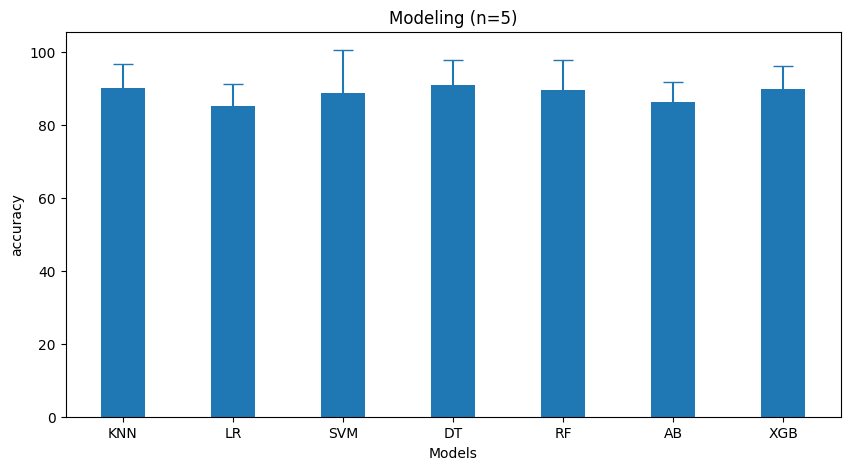

In [ ]:
#Visualize

bar = {'KNN':90.29, 'LR':85.33, 'SVM':88.86, 'DT':90.91, 'RF':89.68, 'AB':86.36, 'XGB':89.88}
error = np.array([6.53, 5.92, 11.76, 6.88, 8.09, 5.40, 6.49])
courses = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4, color=plt.cm.tab10.colors[0])
plt.errorbar(courses, values, error, capsize=7, linestyle='None', ecolor=plt.cm.tab10.colors[0])

plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title('Modeling (n=5)')

plt.show()


In [ ]:
#df_encoded
X_aca = df_encoded[:][df_encoded['flavonoid_Acacetin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_aca = df_encoded[:][df_encoded['flavonoid_Acacetin']==1]['v01']

X_apg = df_encoded[:][df_encoded['flavonoid_Apigenin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_apg = df_encoded[:][df_encoded['flavonoid_Apigenin']==1]['v01']

X_chr = df_encoded[:][df_encoded['flavonoid_Chrysin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_chr = df_encoded[:][df_encoded['flavonoid_Chrysin']==1]['v01']

X_gal = df_encoded[:][df_encoded['flavonoid_Galangin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_gal = df_encoded[:][df_encoded['flavonoid_Galangin']==1]['v01']

X_kae = df_encoded[:][df_encoded['flavonoid_Kaempferol']==1].drop(['viability-mean', 'v01'], axis=1)
y01_kae = df_encoded[:][df_encoded['flavonoid_Kaempferol']==1]['v01']

X_lut = df_encoded[:][df_encoded['flavonoid_Luteolin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_lut = df_encoded[:][df_encoded['flavonoid_Luteolin']==1]['v01']

X_myr = df_encoded[:][df_encoded['flavonoid_Myricetin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_myr = df_encoded[:][df_encoded['flavonoid_Myricetin']==1]['v01']

X_que = df_encoded[:][df_encoded['flavonoid_Quercetin']==1].drop(['viability-mean', 'v01'], axis=1)
y01_que = df_encoded[:][df_encoded['flavonoid_Quercetin']==1]['v01']

In [ ]:
#fit & validation

dtc.fit(X_aca, y01_aca)
dtc_aca = dtc.predict(X_aca)
dtc.fit(X_apg, y01_apg)
dtc_apg = dtc.predict(X_apg)
dtc.fit(X_chr, y01_chr)
dtc_chr = dtc.predict(X_chr)
dtc.fit(X_gal, y01_gal)
dtc_gal = dtc.predict(X_gal)
dtc.fit(X_kae, y01_kae)
dtc_kae = dtc.predict(X_kae)
dtc.fit(X_lut, y01_lut)
dtc_lut = dtc.predict(X_lut)
dtc.fit(X_myr, y01_myr)
dtc_myr = dtc.predict(X_myr)
dtc.fit(X_que, y01_que)
dtc_que = dtc.predict(X_que)


In [ ]:
print("aca (Train): ", accuracy_score(y01_aca, dtc_aca))
print("apg (Train): ", accuracy_score(y01_apg, dtc_apg))
print("chr (Train): ", accuracy_score(y01_chr, dtc_chr))
print("gal (Train): ", accuracy_score(y01_gal, dtc_gal))
print("kae (Train): ", accuracy_score(y01_kae, dtc_kae))
print("lut (Train): ", accuracy_score(y01_lut, dtc_lut))
print("myr (Train): ", accuracy_score(y01_myr, dtc_myr))
print("que (Train): ", accuracy_score(y01_que, dtc_que))


aca (Train):  1.0
apg (Train):  1.0
chr (Train):  0.9782608695652174
gal (Train):  1.0
kae (Train):  0.96
lut (Train):  1.0
myr (Train):  1.0
que (Train):  1.0


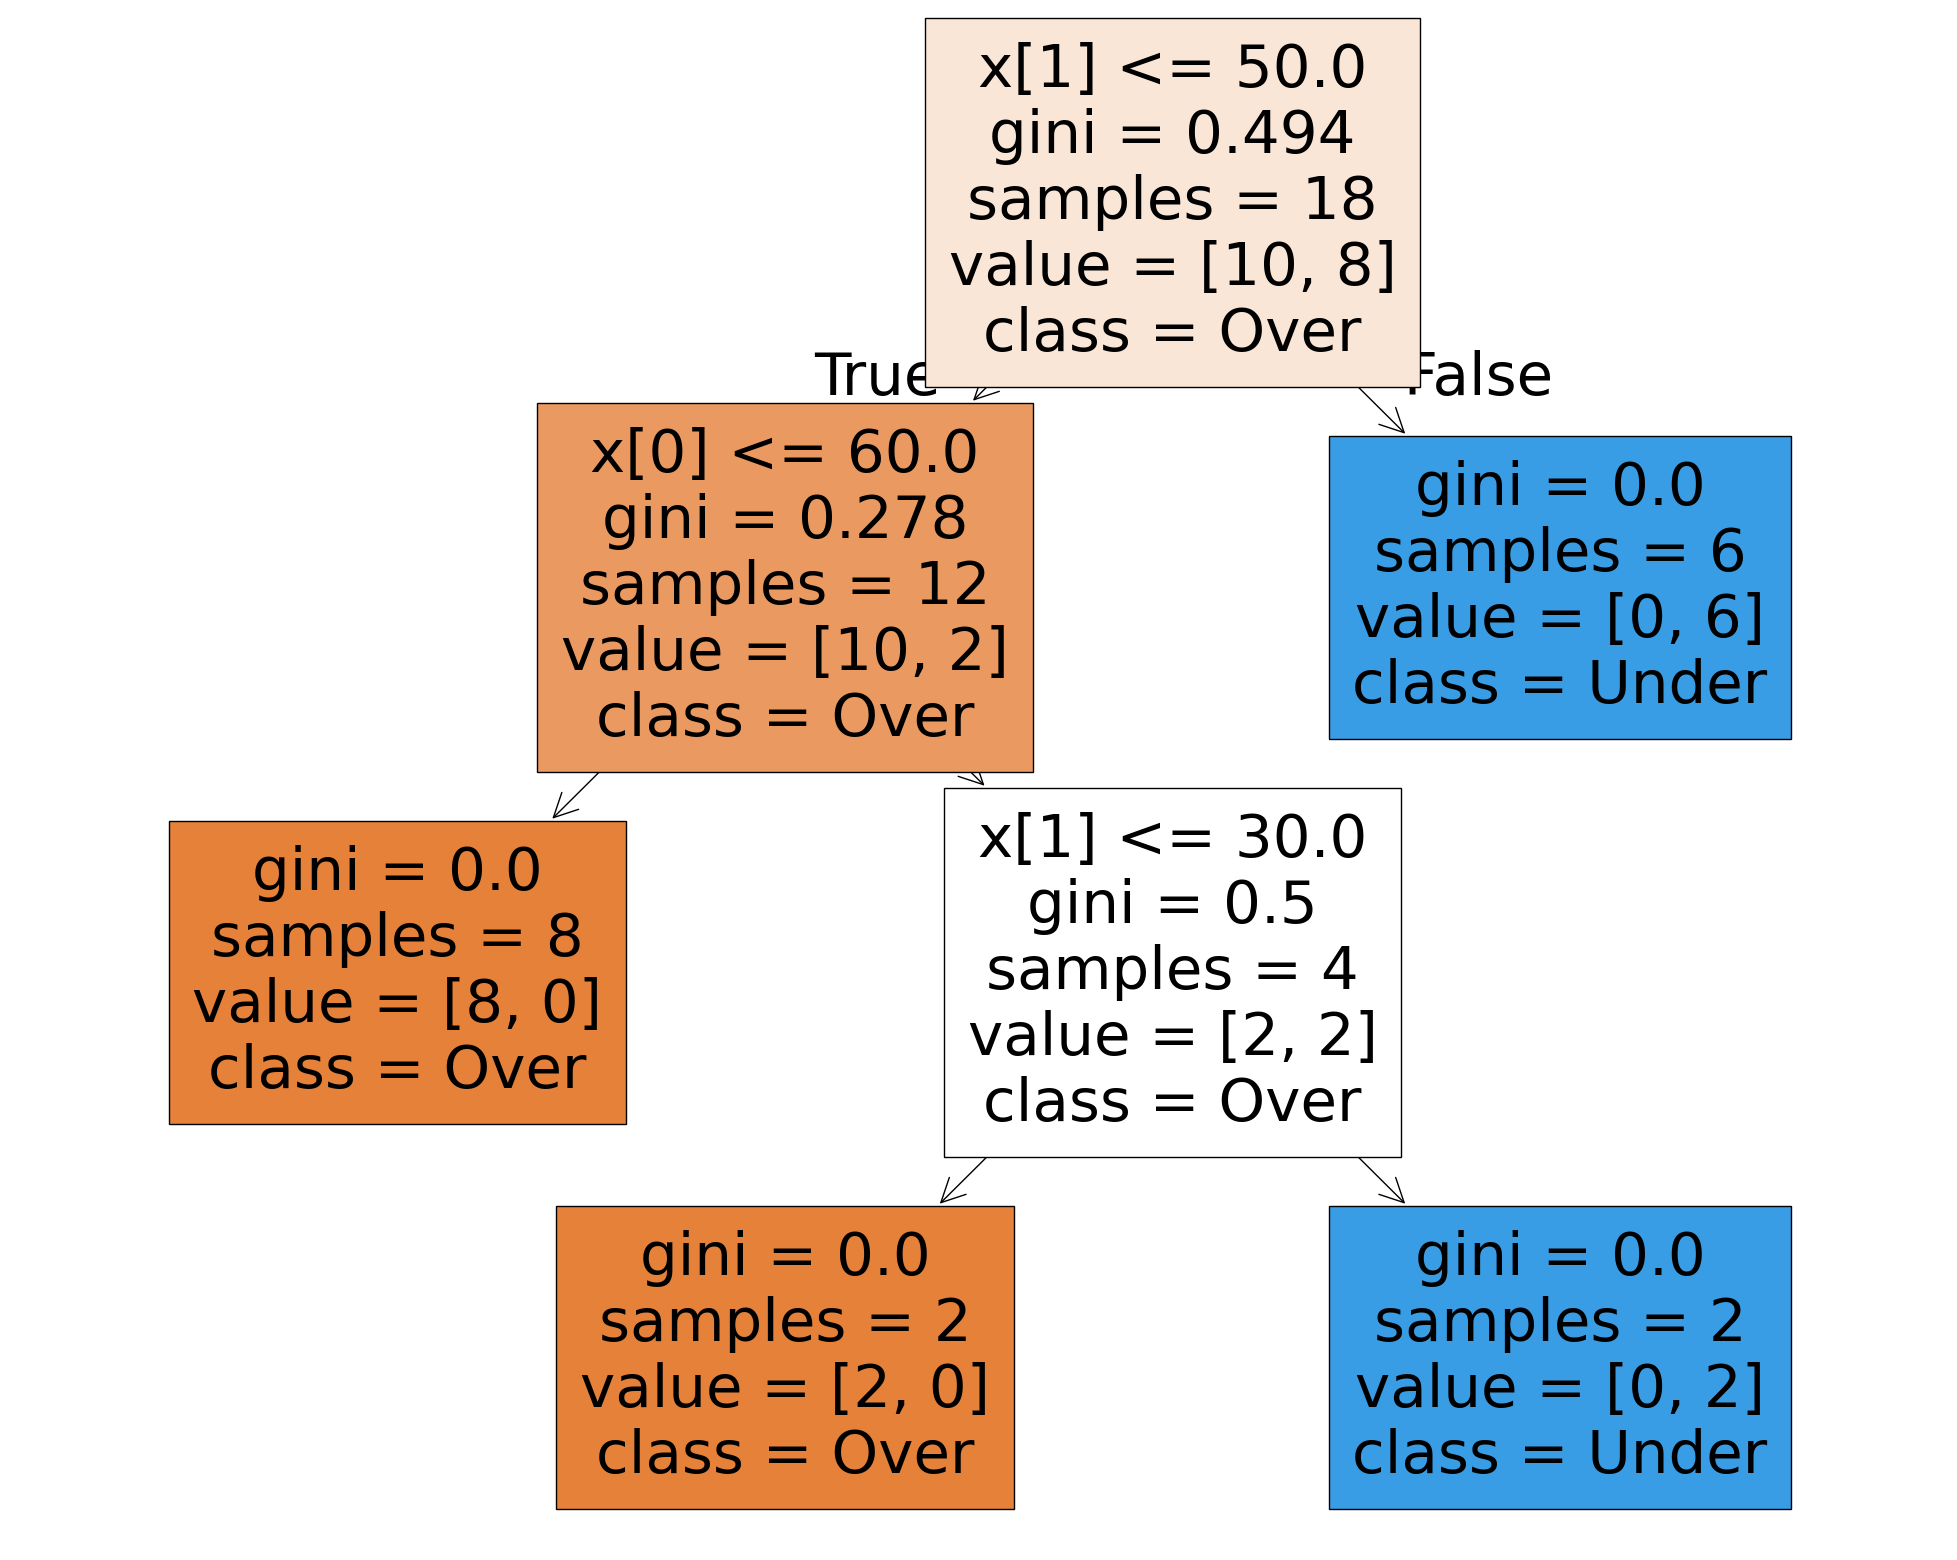

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_aca, y01_aca)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

[Text(0.6, 0.9166666666666666, 'x[1] <= 77.5\ngini = 0.386\nsamples = 69\nvalue = [51, 18]\nclass = Over'),
 Text(0.3333333333333333, 0.75, 'x[11] <= 0.5\ngini = 0.241\nsamples = 50\nvalue = [43.0, 7.0]\nclass = Over'),
 Text(0.4666666666666667, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[1] <= 35.0\ngini = 0.19\nsamples = 47\nvalue = [42, 5]\nclass = Over'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = Over'),
 Text(0.26666666666666666, 0.4166666666666667, 'x[14] <= 0.5\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = Over'),
 Text(0.13333333333333333, 0.25, 'x[1] <= 67.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Over'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Over'),
 Text(0.2, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Over'),
 Text(0.4, 0.25, 'x[0] <= 36.0\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\ncla

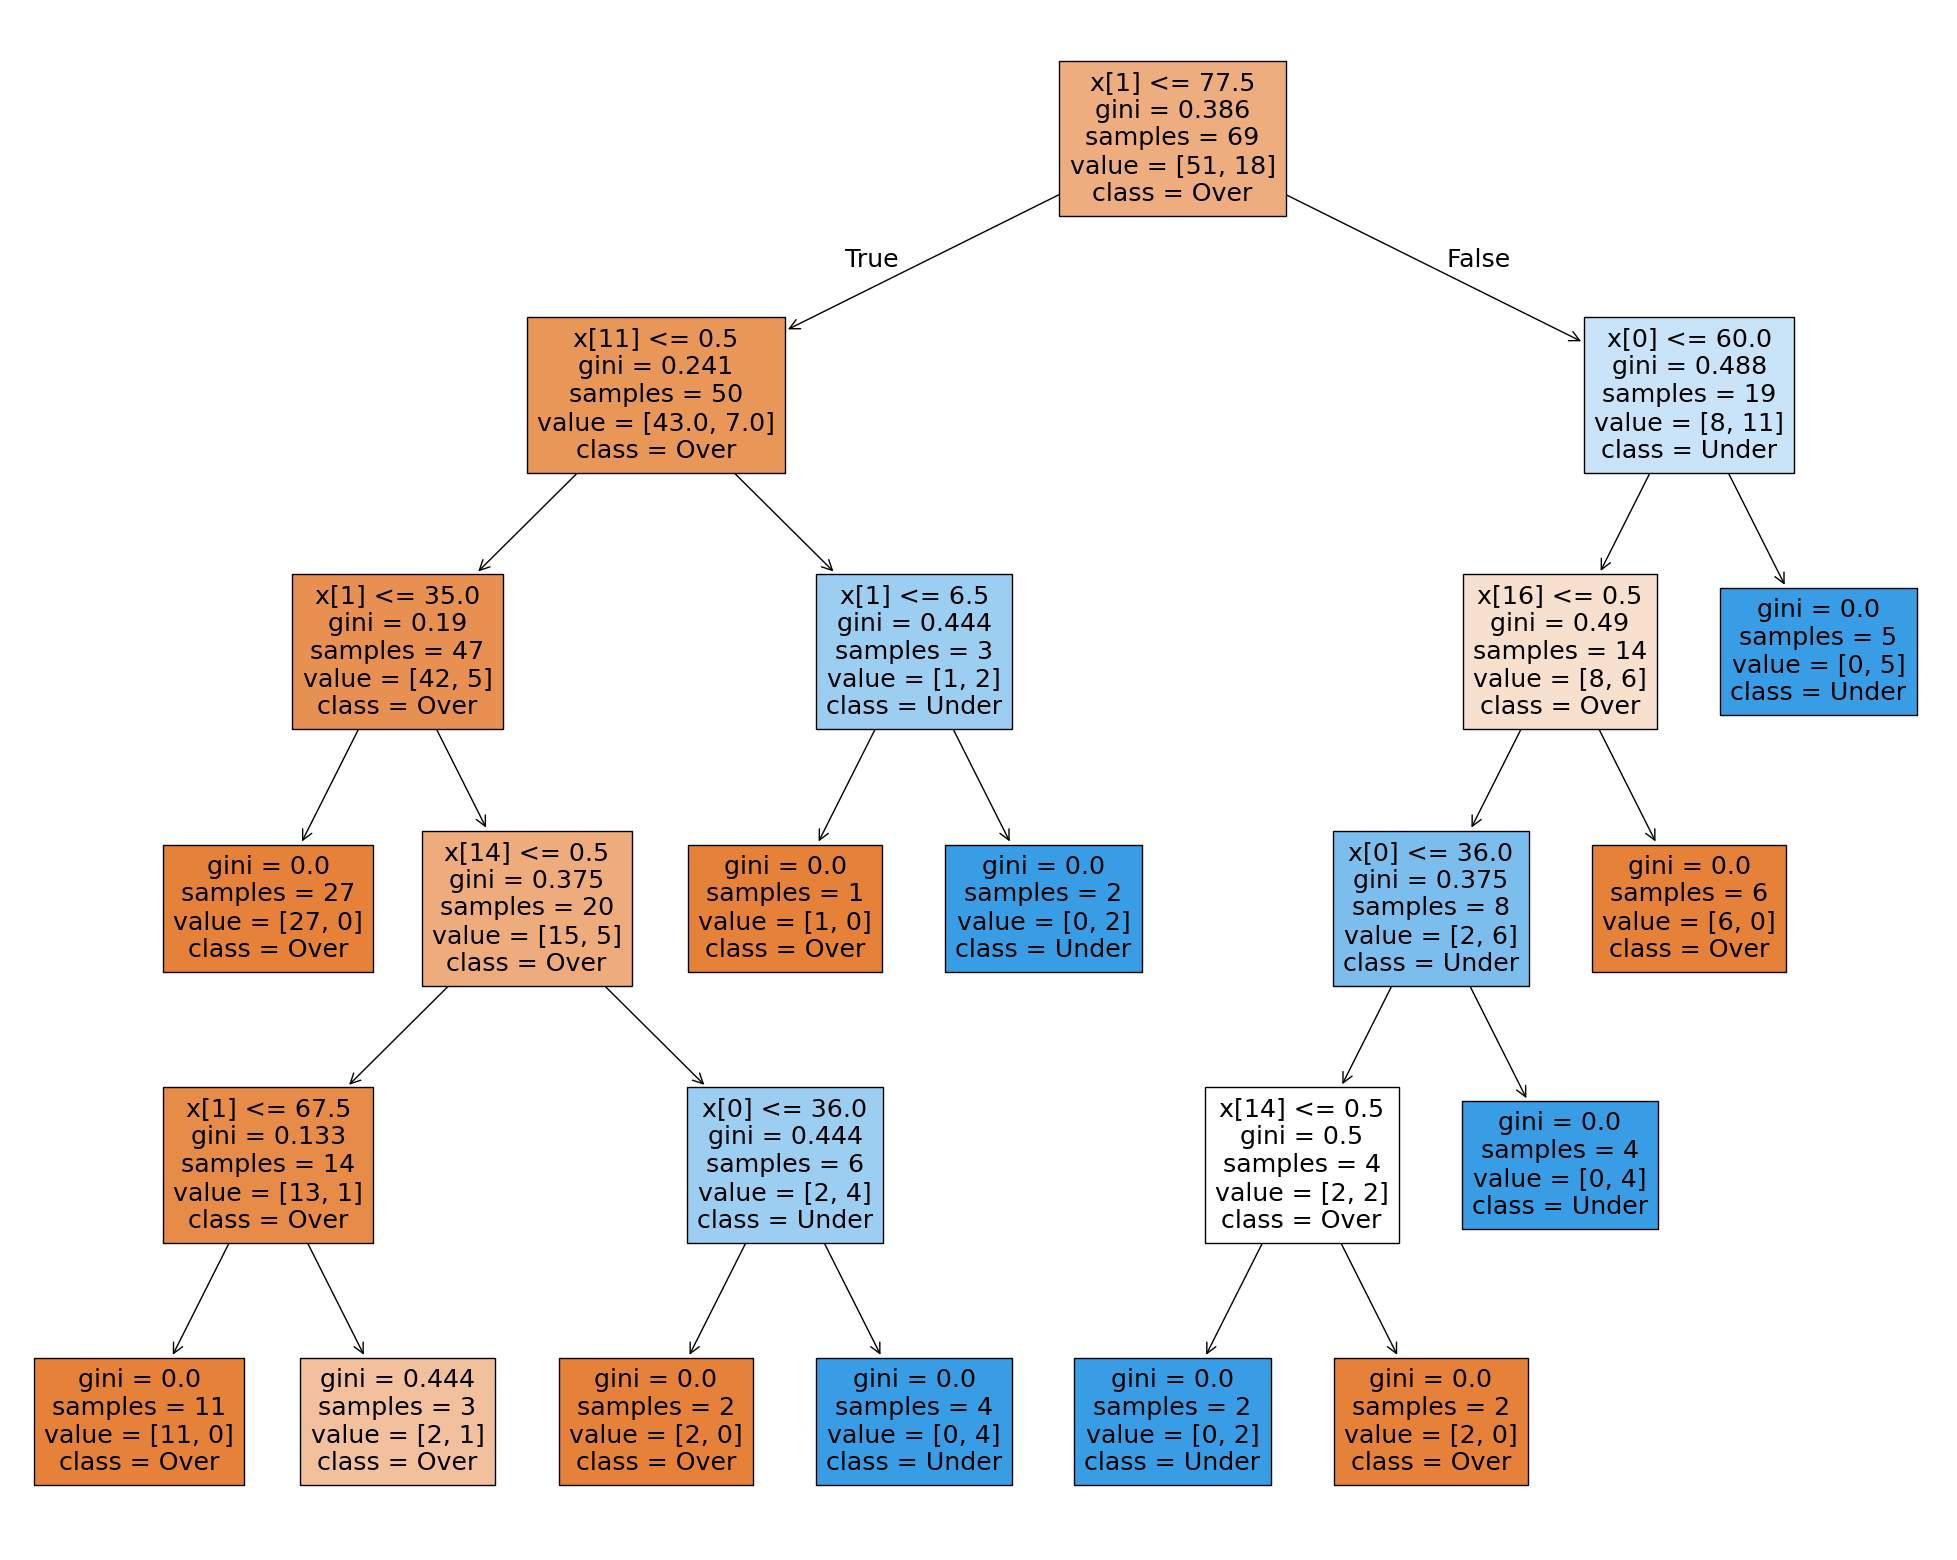

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_apg, y01_apg)

fig = plt.figure(figsize=(25,20))
plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

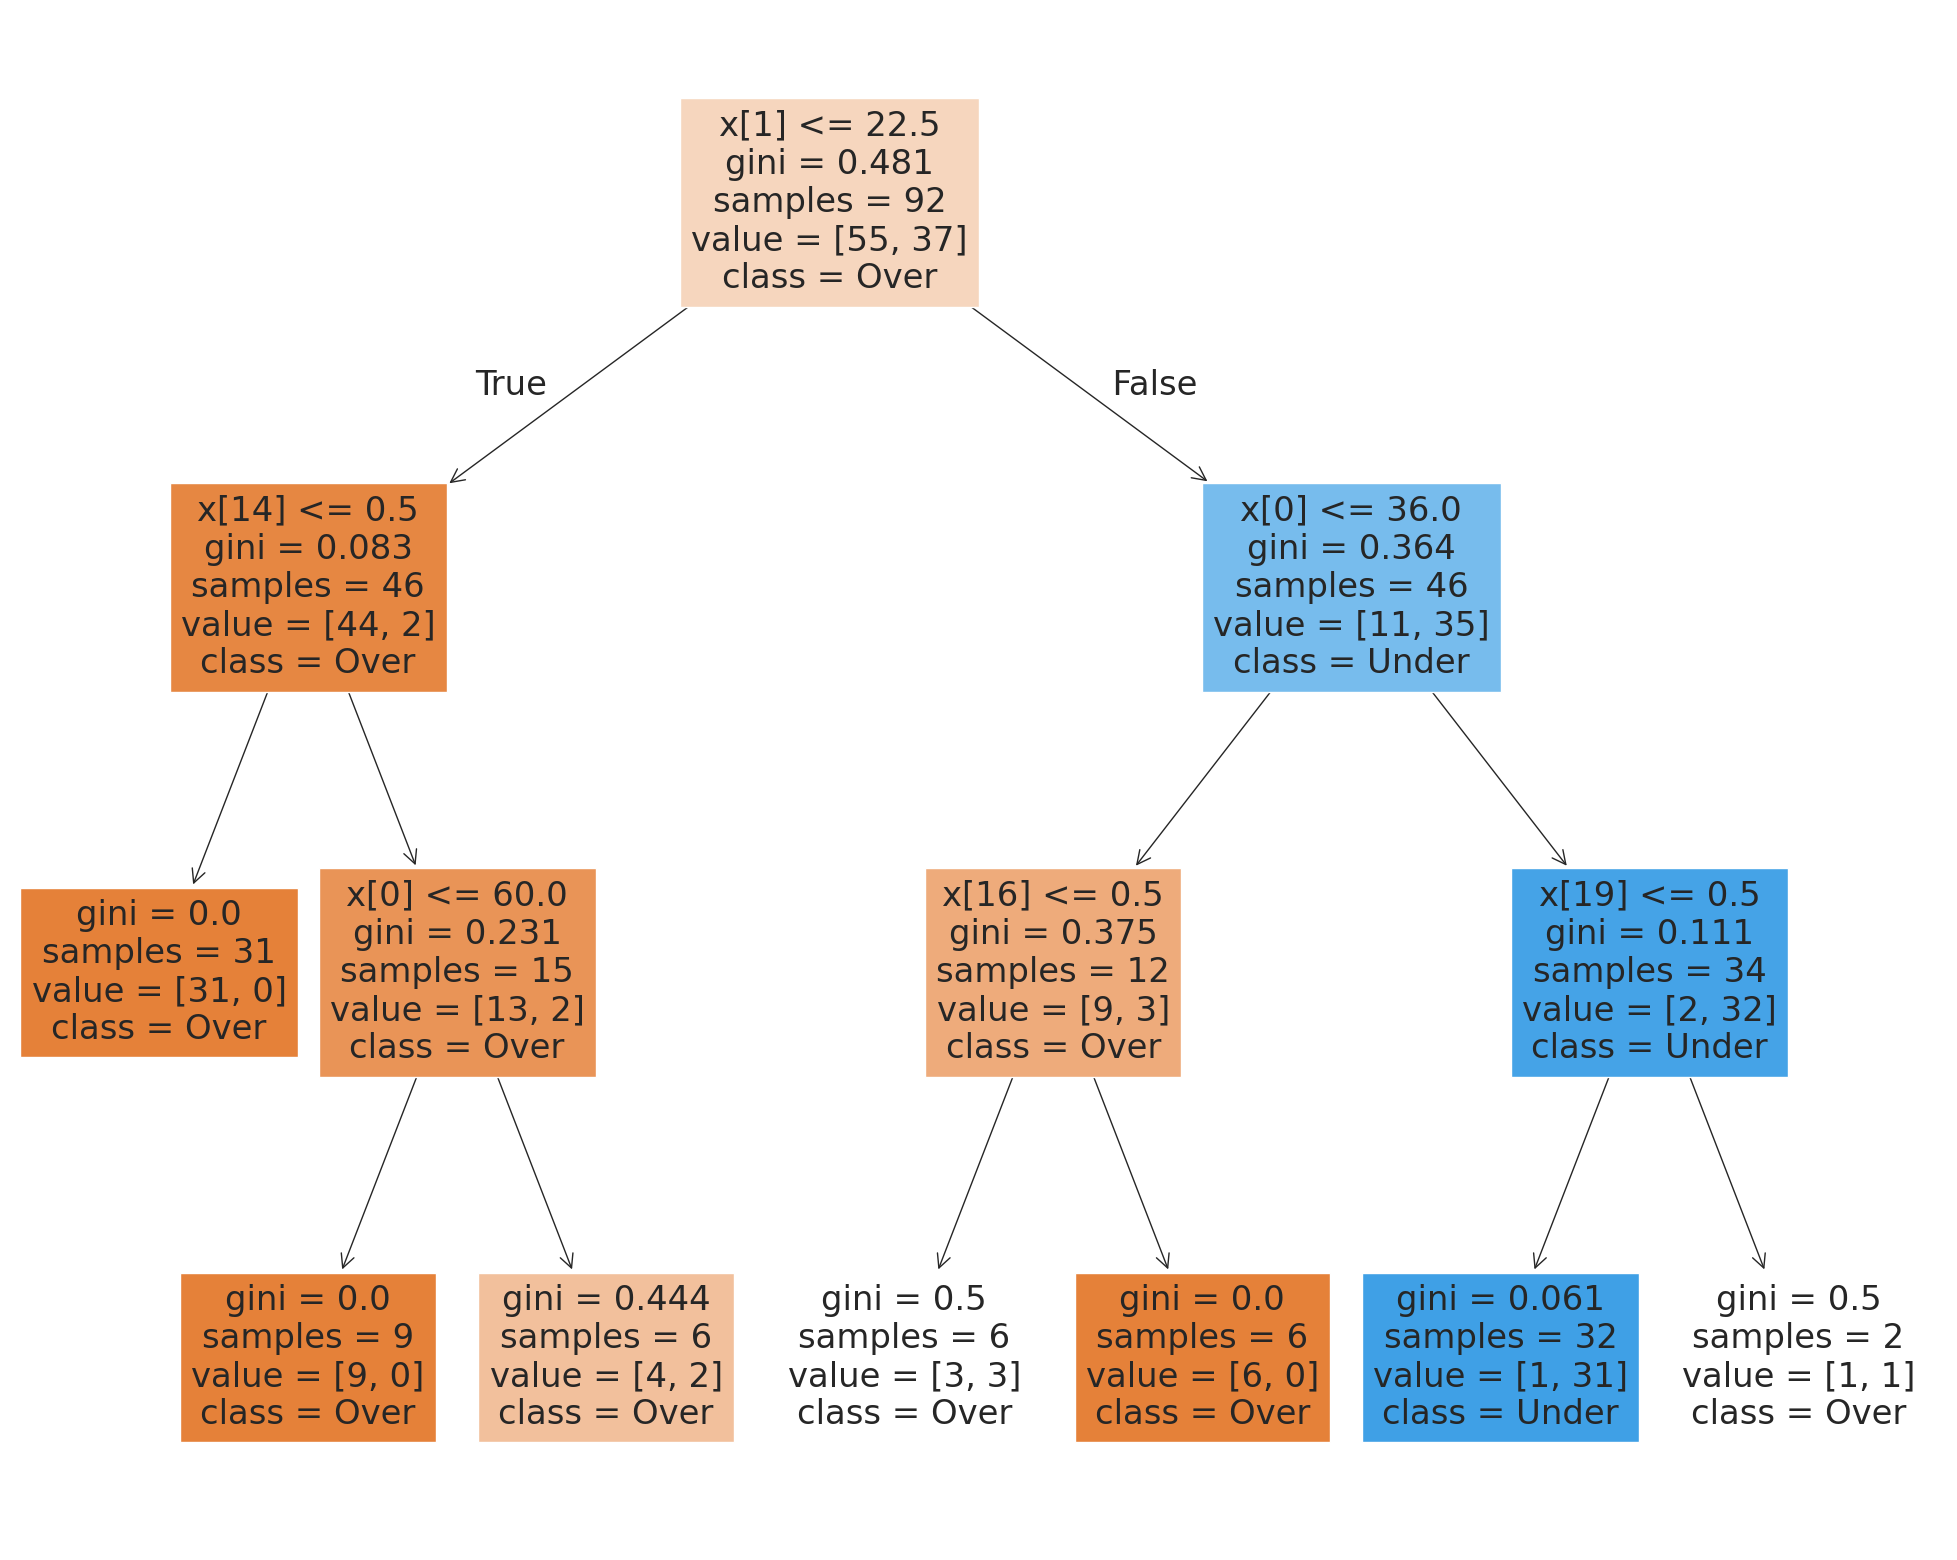

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_chr, y01_chr)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

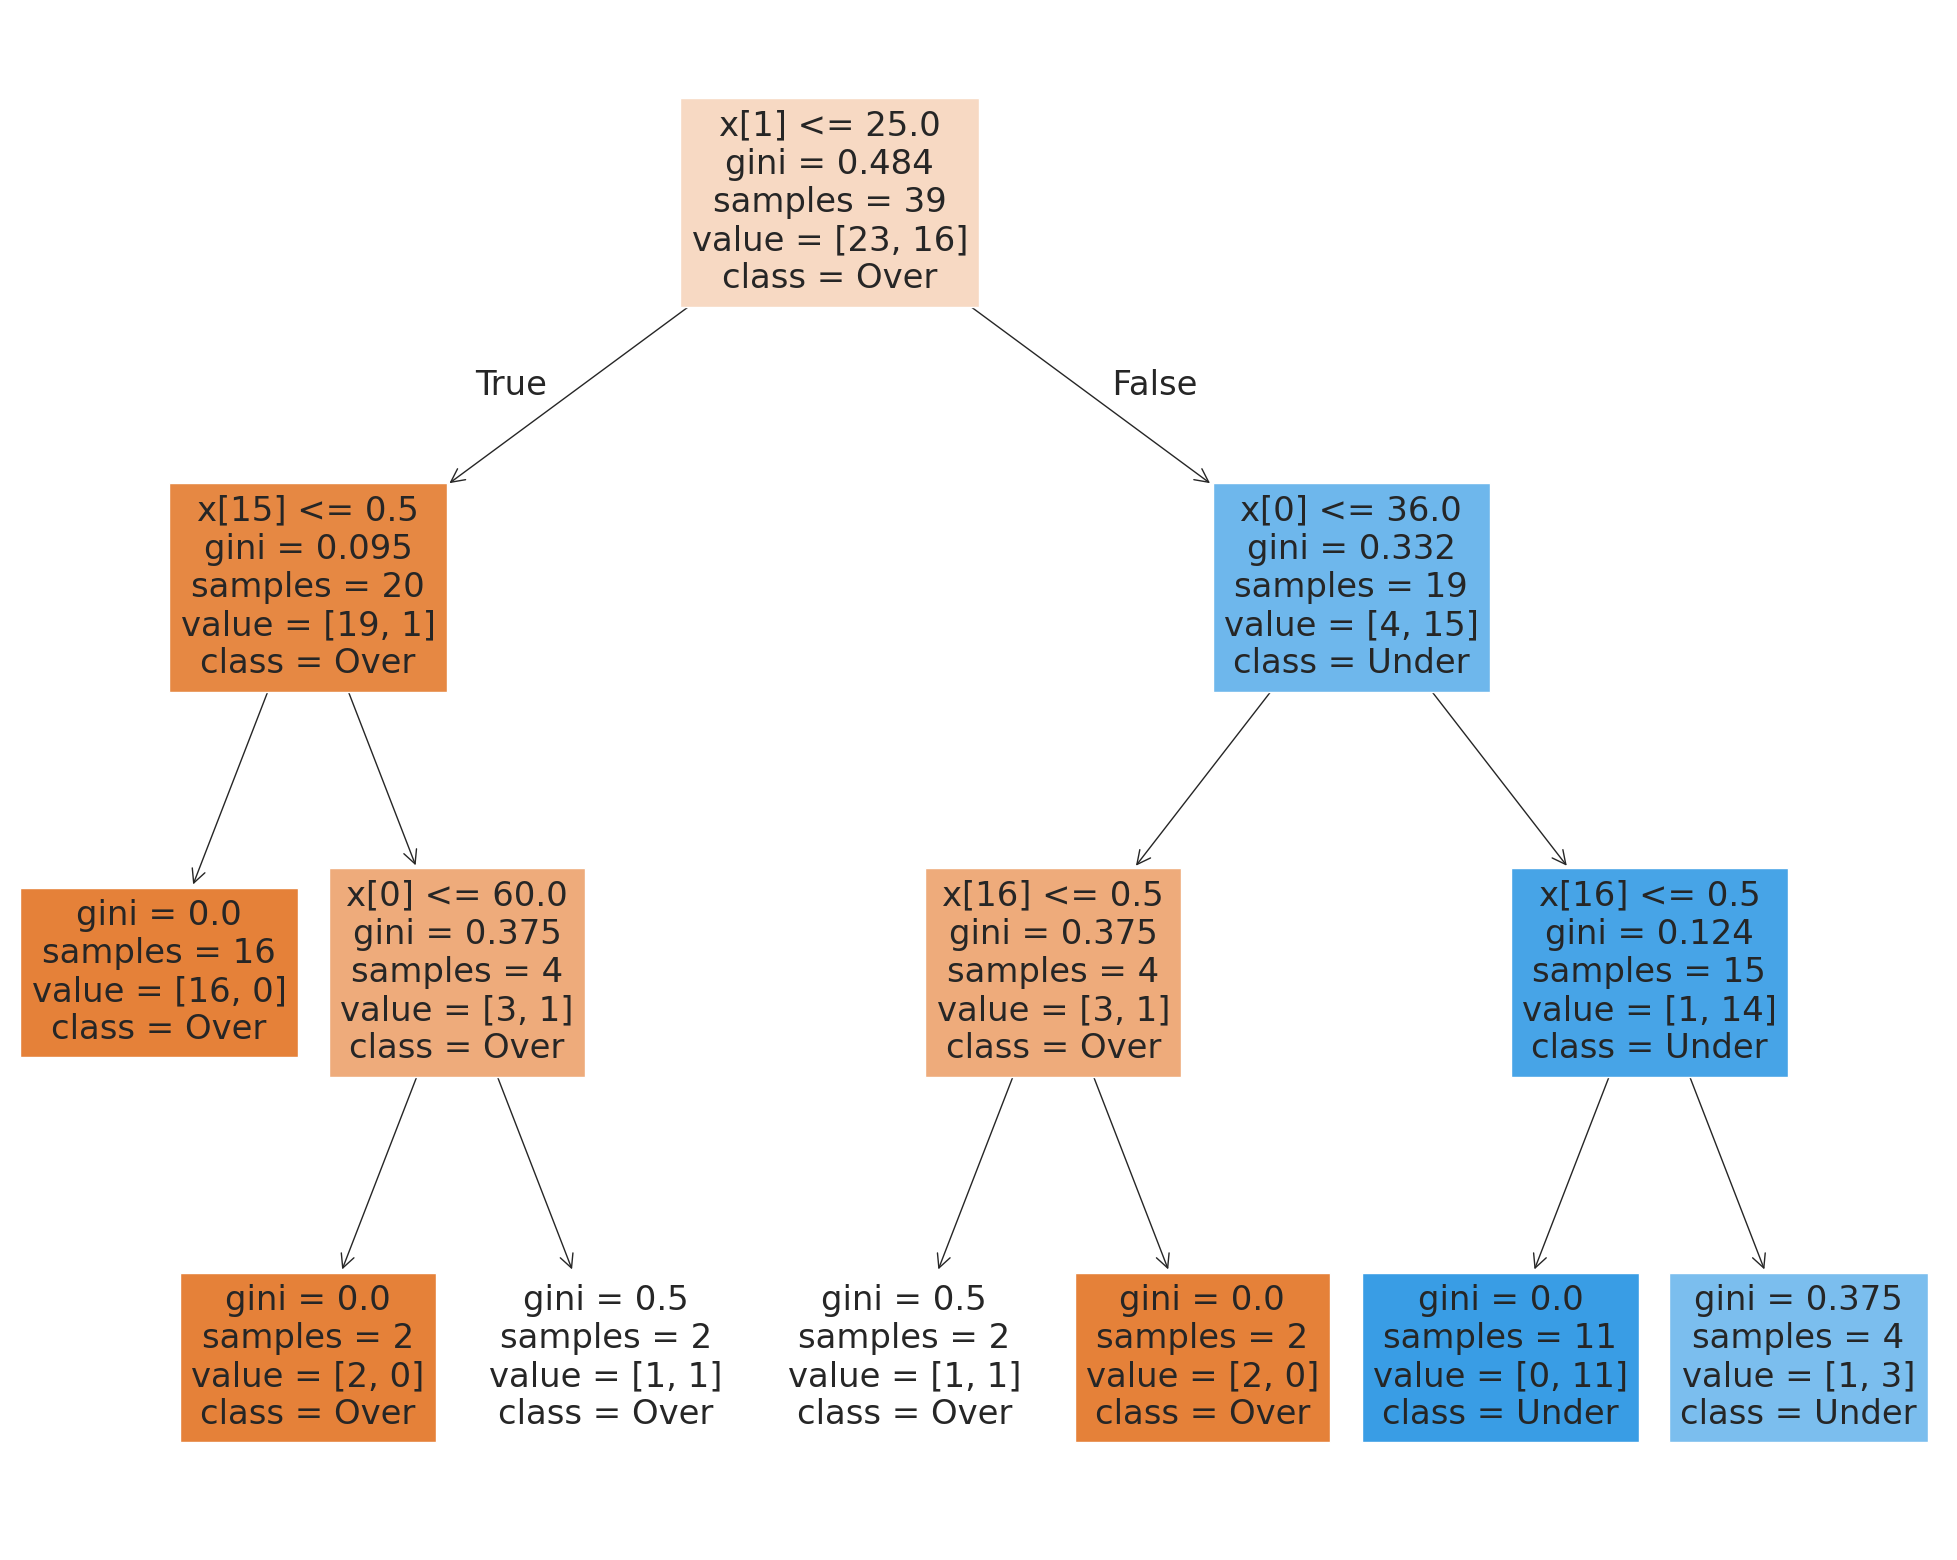

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_gal, y01_gal)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

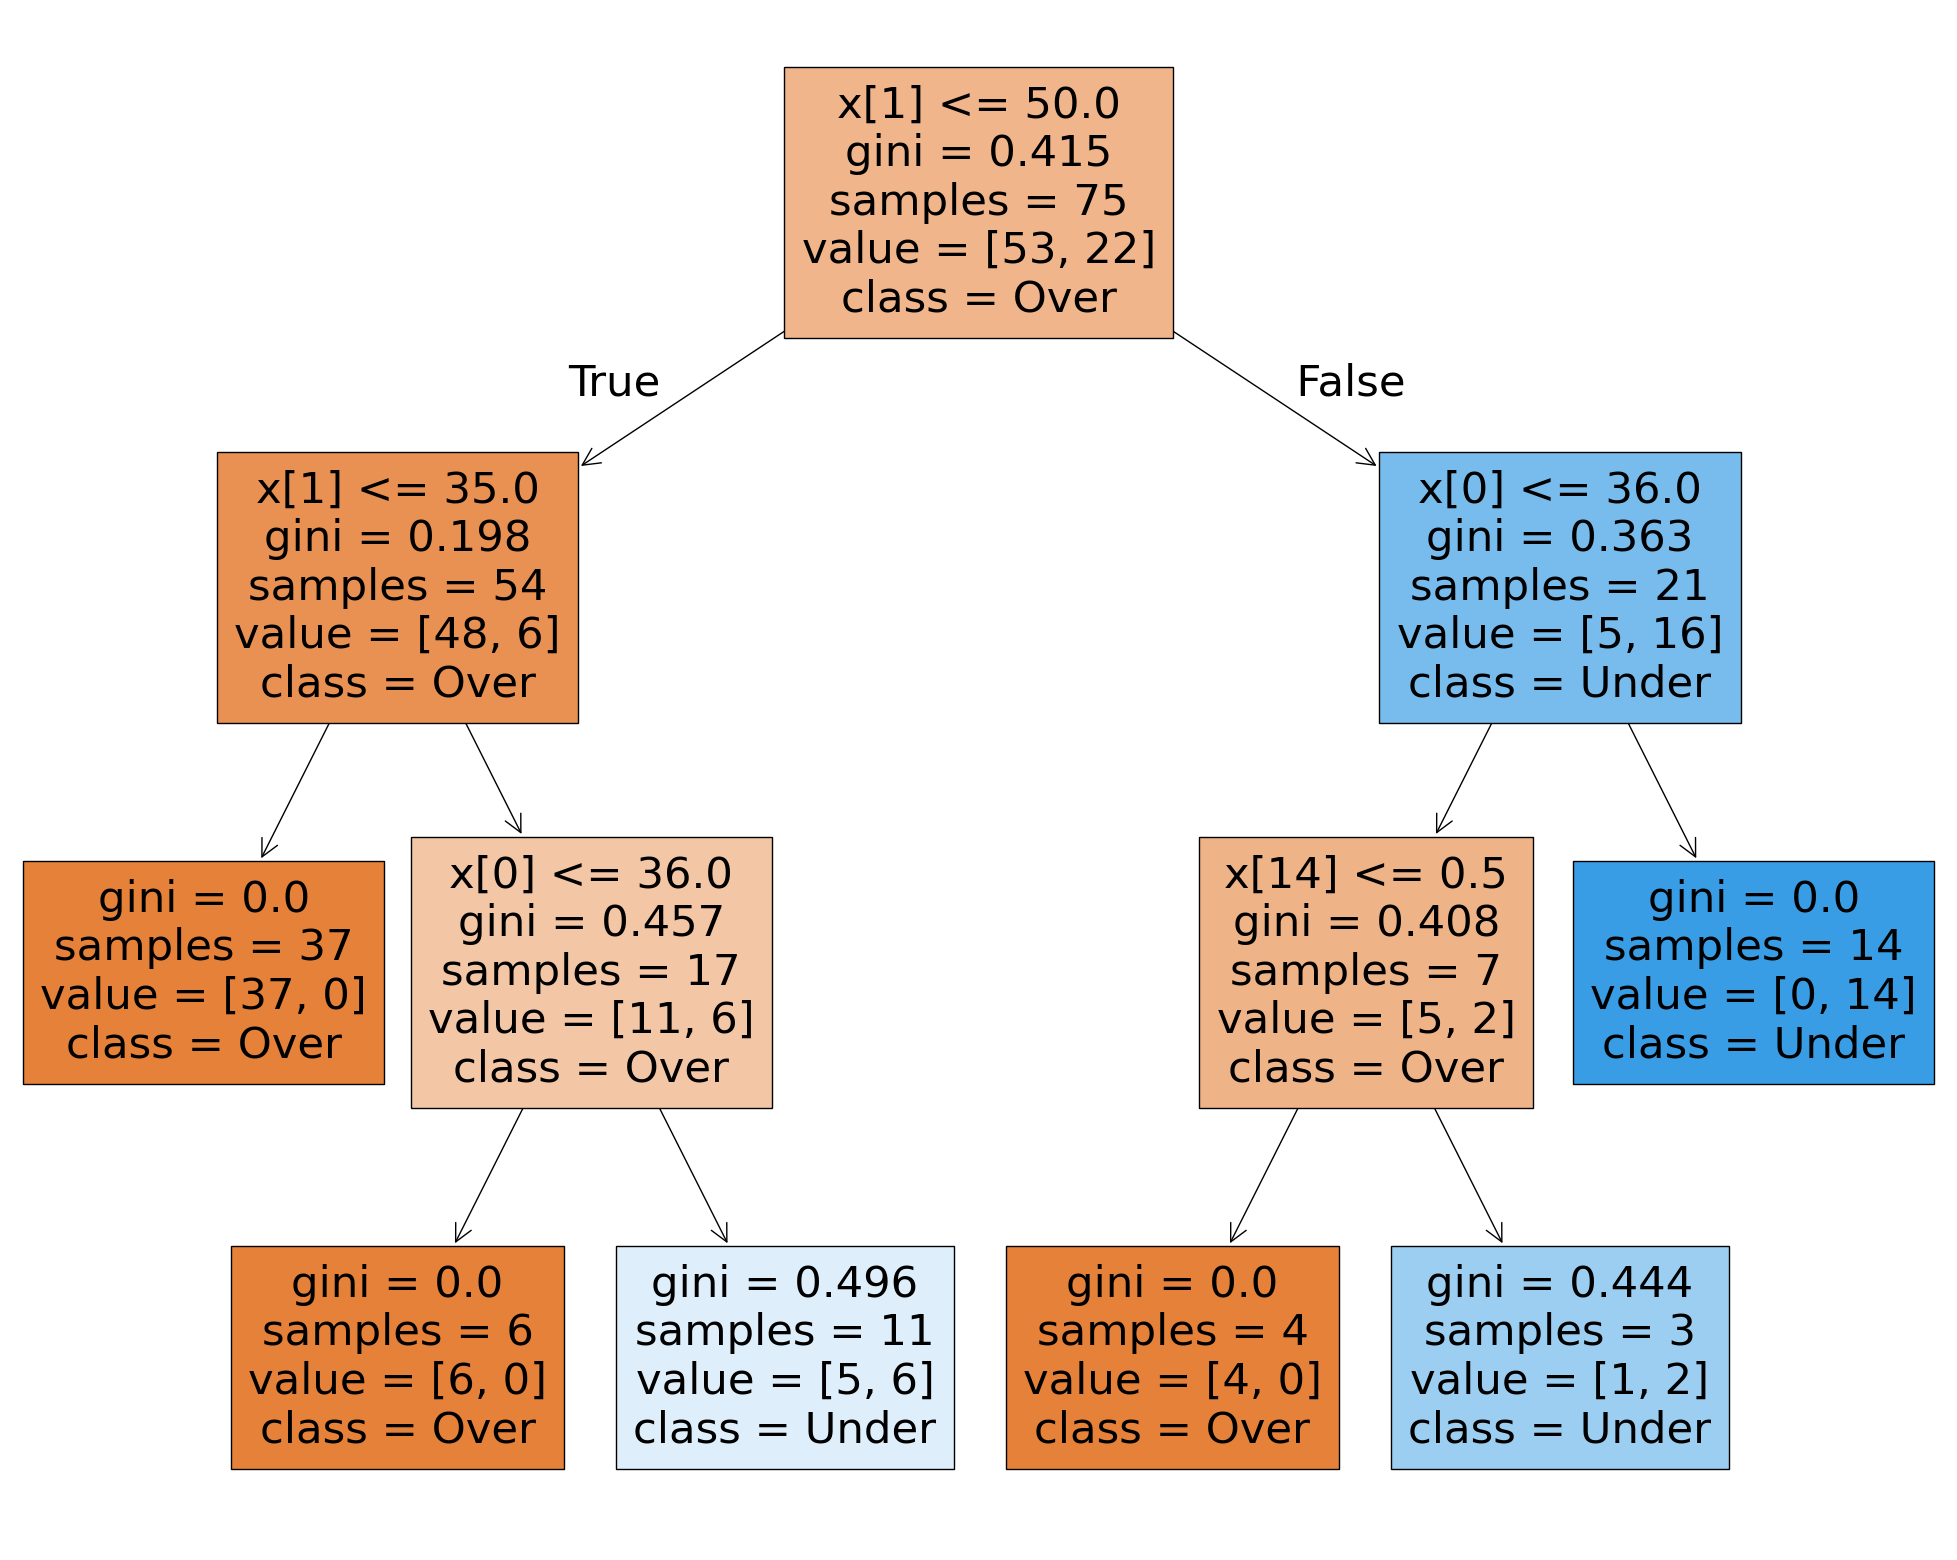

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_kae, y01_kae)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

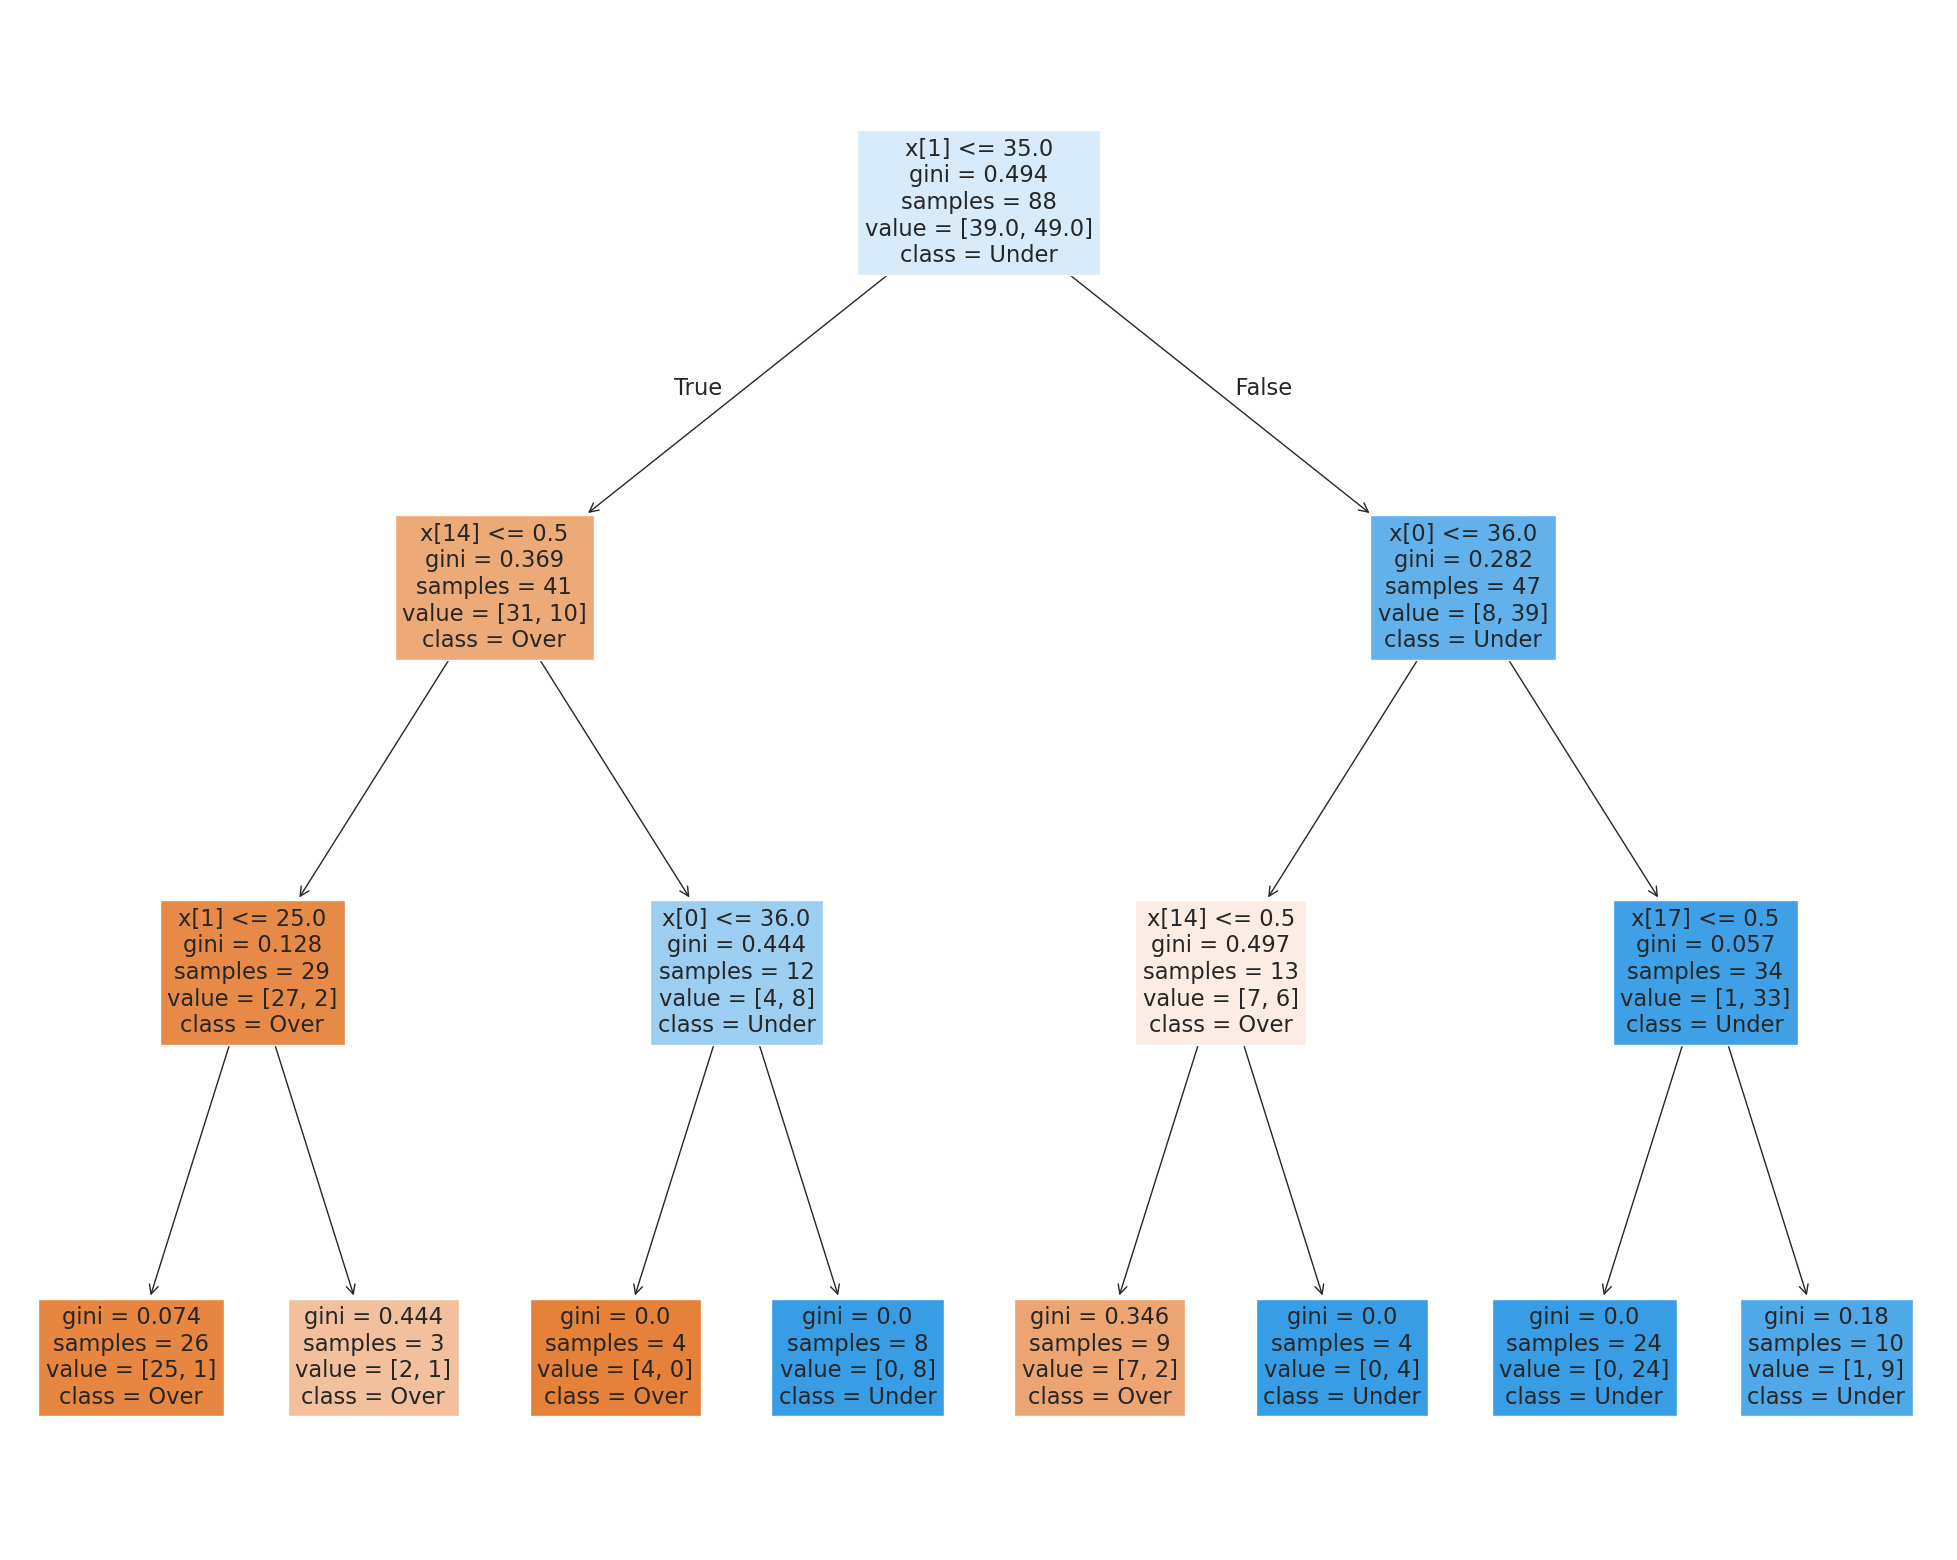

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_lut, y01_lut)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

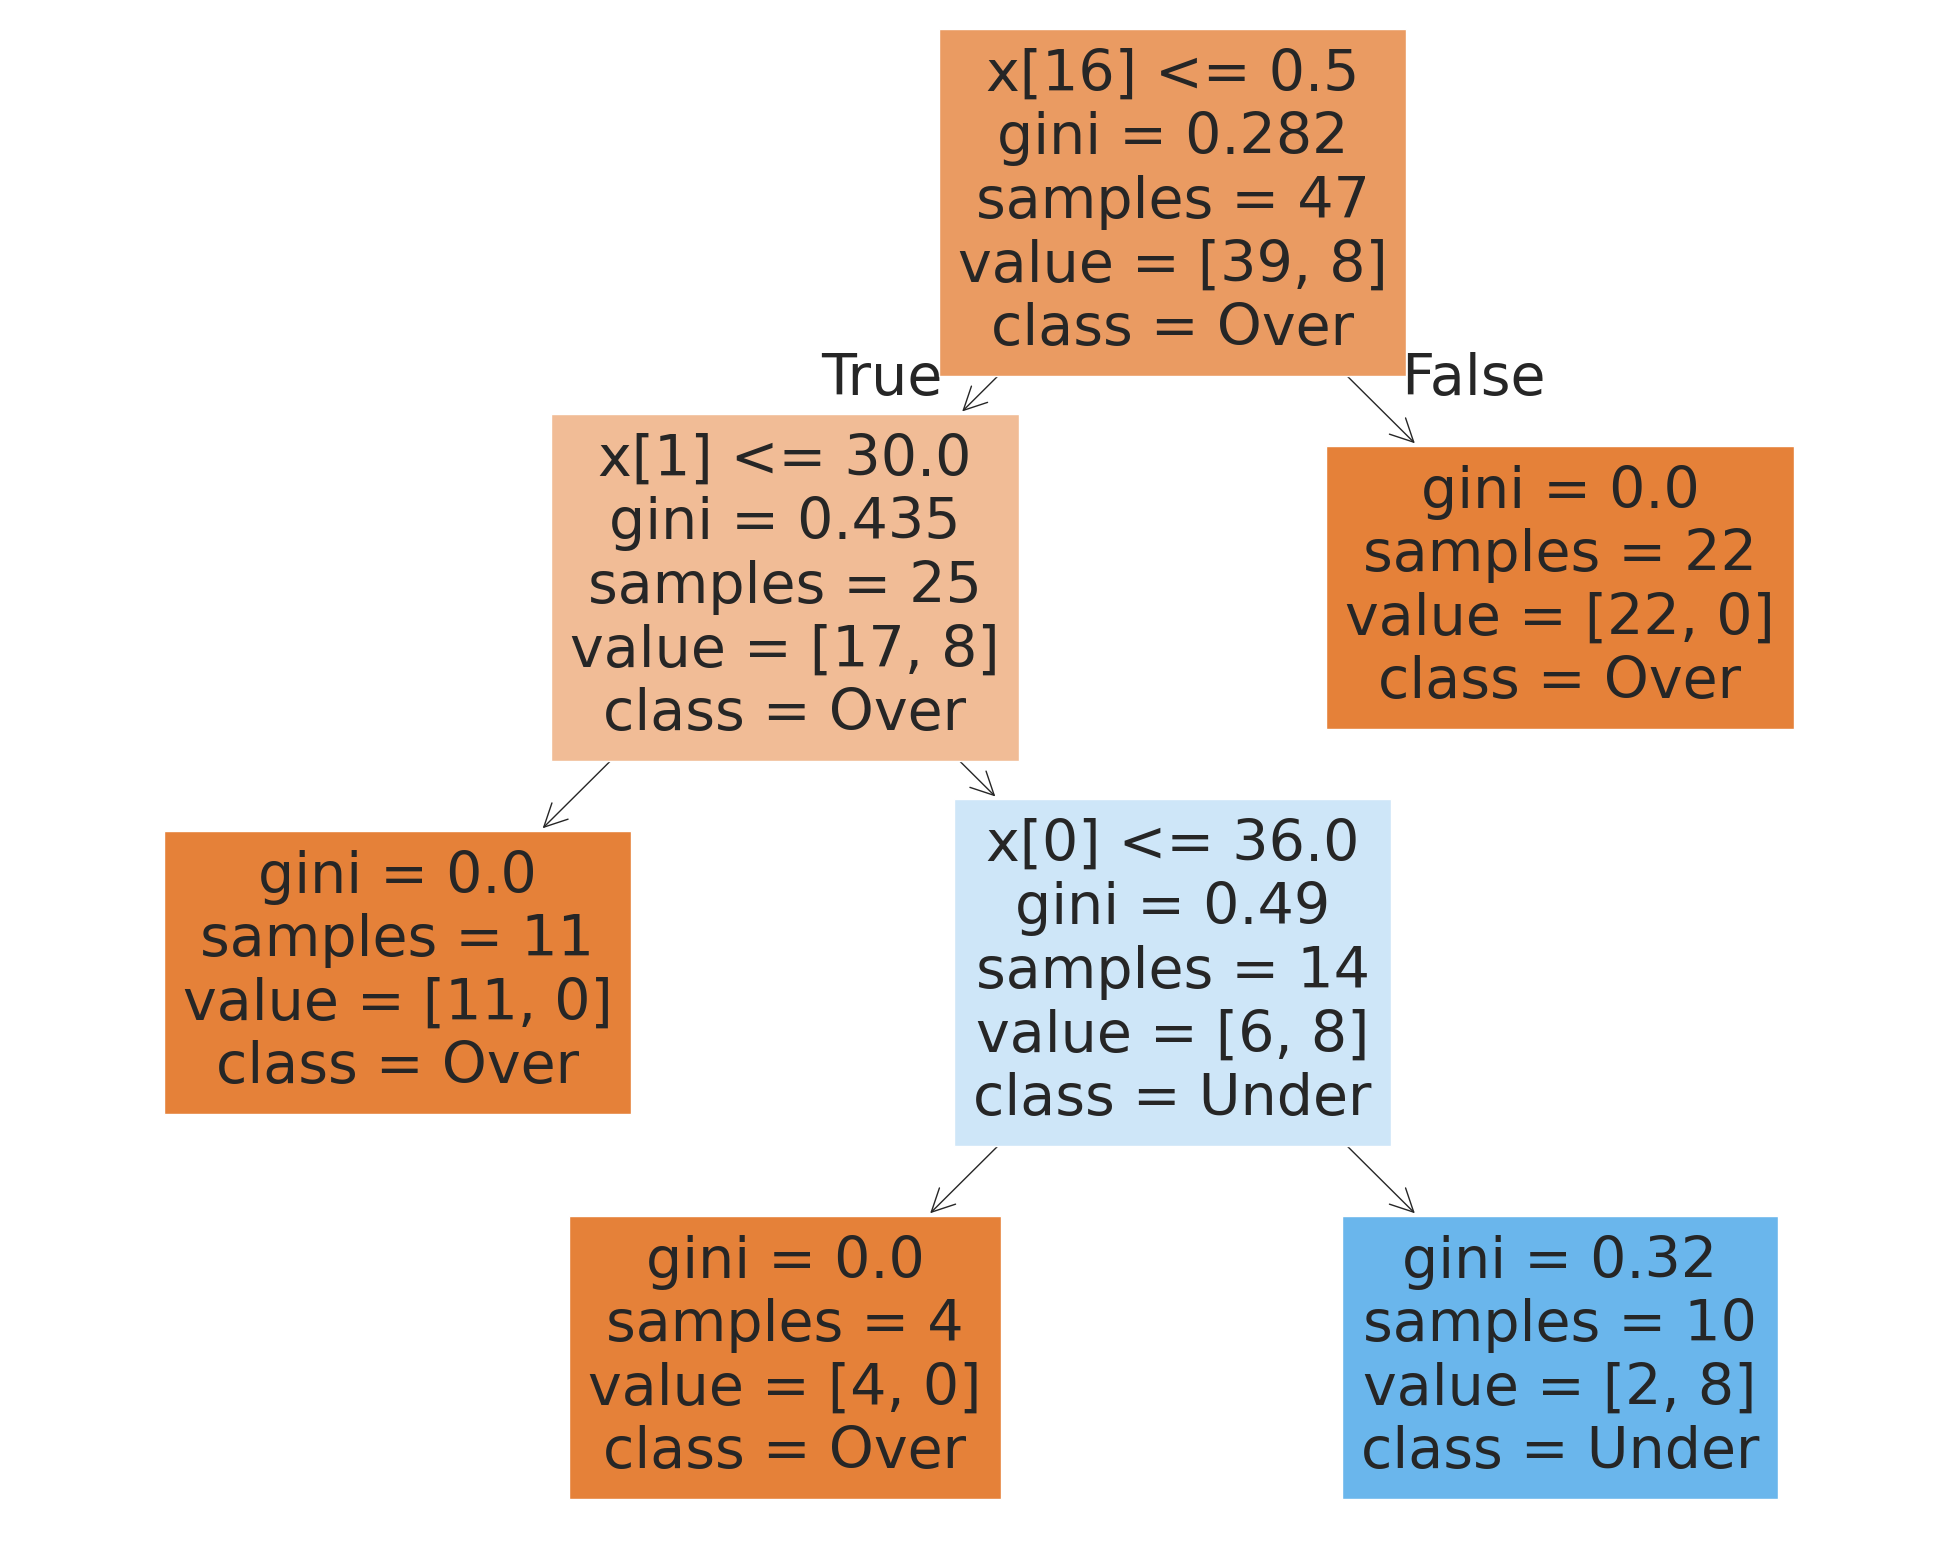

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_myr, y01_myr)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

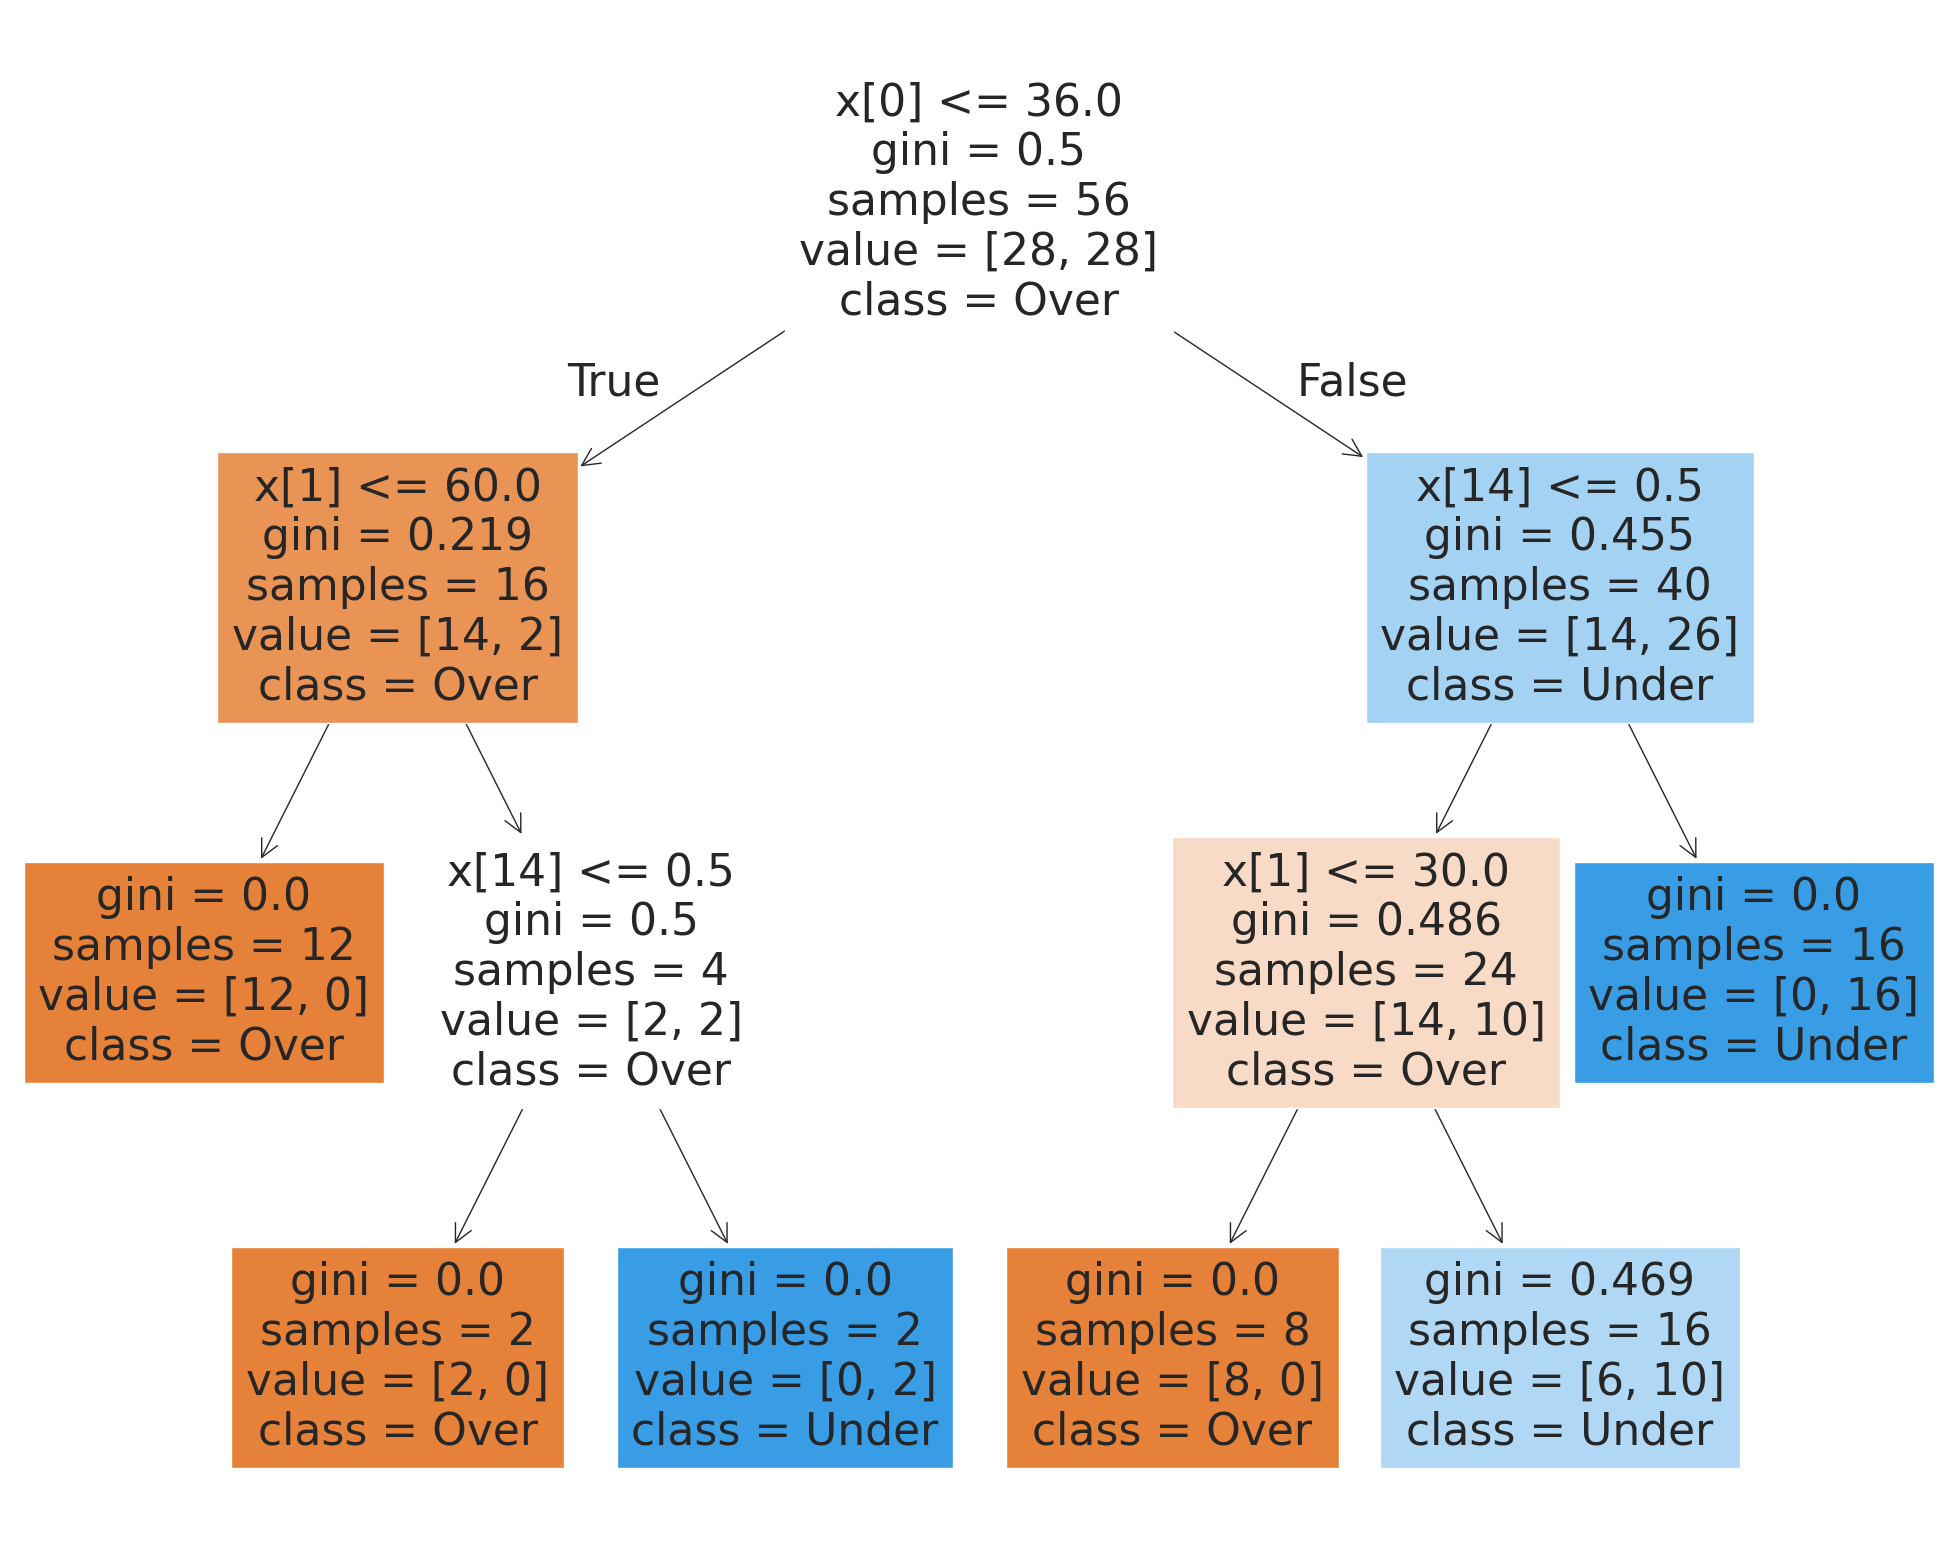

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
dtc.fit(X_que, y01_que)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, class_names=['Over', 'Under'], filled=True)

## Correlation & EFS

<Axes: >

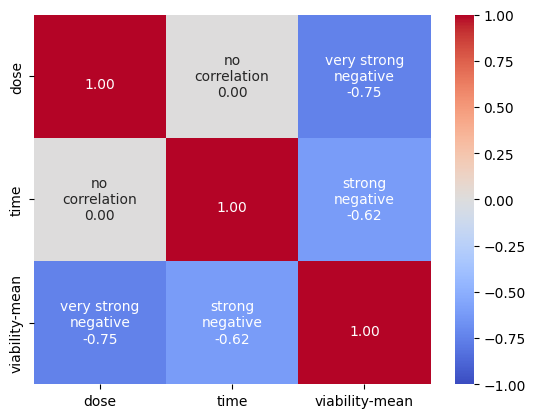

In [ ]:
matrix11 = df.loc[df['flavonoid']=='Acacetin', ['dose', 'time', 'viability-mean']].corr()

text11 = np.array([['', 'no\ncorrelation', 'very strong\nnegative'],
 ['no\ncorrelation', '', 'strong\nnegative'],
 ['very strong\nnegative', 'strong\nnegative', '']])

matrix11_arr = np.array(matrix11)

formatted_text11 = (np.asarray(["{0}\n{1:.2f}".format(text11, matrix11) for text11, matrix11
                                in zip(text11.flatten(), matrix11_arr.flatten())])).reshape(3, 3)

sns.heatmap(matrix11, annot=formatted_text11, fmt="", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

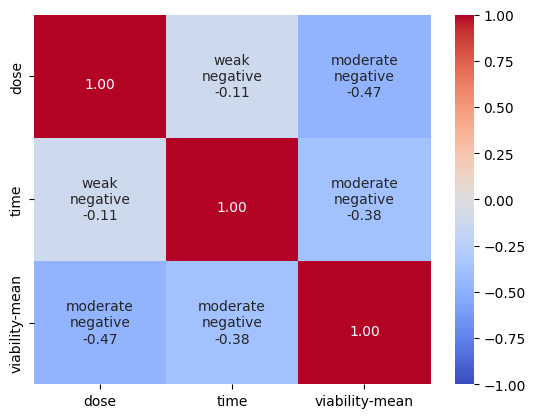

In [ ]:
matrix12 = df.loc[df['flavonoid']=='Apigenin', ['dose', 'time', 'viability-mean']].corr()

text12 = np.array([['', 'weak\nnegative', 'moderate\nnegative'],
 ['weak\nnegative', '', 'moderate\nnegative'],
 ['moderate\nnegative', 'moderate\nnegative', '']])

matrix12_arr = np.array(matrix12)

formatted_text12 = (np.asarray(["{0}\n{1:.2f}".format(text12, matrix12) for text12, matrix12
                                in zip(text12.flatten(), matrix12_arr.flatten())])).reshape(3, 3)

sns.heatmap(matrix12, annot=formatted_text12, fmt="", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

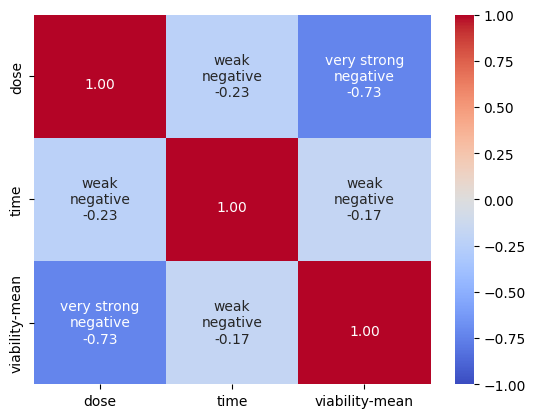

In [ ]:
matrix13 = df.loc[df['flavonoid']=='Chrysin', ['dose', 'time', 'viability-mean']].corr()

text13 = np.array([['', 'weak\nnegative', 'very strong\nnegative'],
 ['weak\nnegative', '', 'weak\nnegative'],
 ['very strong\nnegative', 'weak\nnegative', '']])

matrix13_arr = np.array(matrix13)

formatted_text13 = (np.asarray(["{0}\n{1:.2f}".format(text13, matrix13) for text13, matrix13
                                in zip(text13.flatten(), matrix13_arr.flatten())])).reshape(3, 3)

sns.heatmap(matrix13, annot=formatted_text13, fmt="", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

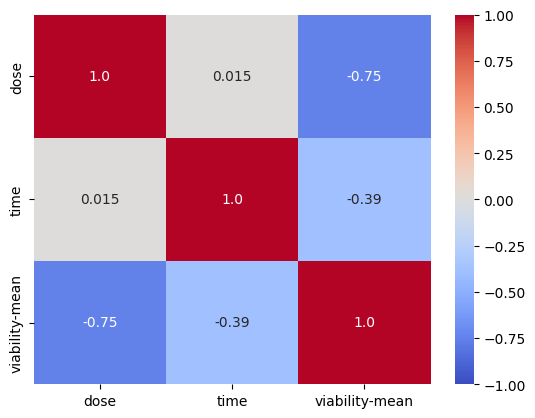

In [ ]:
matrix21 = df.loc[df['flavonoid']=='Galangin', ['dose', 'time', 'viability-mean']].corr()

text21 = np.array([['', 'weak\npositive', 'very strong\nnegative'],
 ['weak\npositive', '', 'moderate\nnegative'],
 ['very strong\nnegative', 'moderate\nnegative', '']])

sns.heatmap(matrix21, annot=True, fmt=".2", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

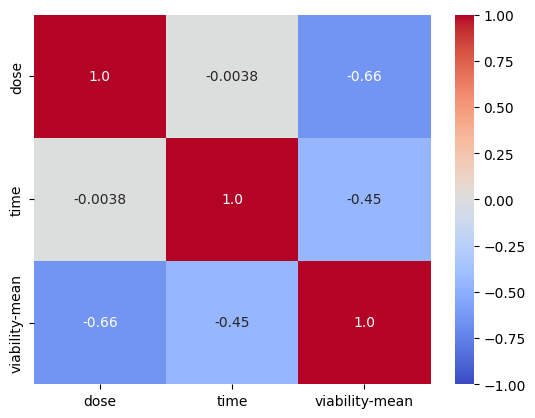

In [ ]:
matrix22 = df.loc[df['flavonoid']=='Kaempferol', ['dose', 'time', 'viability-mean']].corr()

text22 = np.array([['', 'no\ncorrelation', 'strong\nnegative'],
 ['no\ncorrelation', '', 'moderate\nnegative'],
 ['strong\nnegative', 'moderate\nnegative', '']])

sns.heatmap(matrix22, annot=True, fmt=".2", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

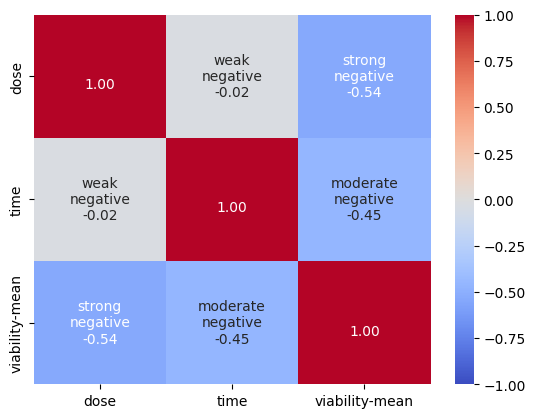

In [ ]:
matrix23 = df.loc[df['flavonoid']=='Luteolin', ['dose', 'time', 'viability-mean']].corr()

text23 = np.array([['', 'weak\nnegative', 'strong\nnegative'],
 ['weak\nnegative', '', 'moderate\nnegative'],
 ['strong\nnegative', 'moderate\nnegative', '']])

matrix23_arr = np.array(matrix23)

formatted_text23 = (np.asarray(["{0}\n{1:.2f}".format(text23, matrix23) for text23, matrix23
                                in zip(text23.flatten(), matrix23_arr.flatten())])).reshape(3, 3)

sns.heatmap(matrix23, annot=formatted_text23, fmt="", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

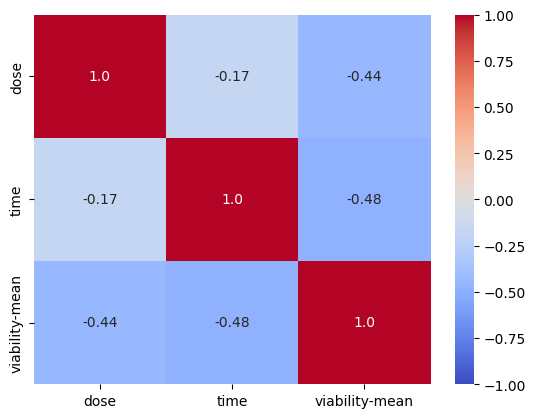

In [ ]:
matrix31 = df.loc[df['flavonoid']=='Myricetin', ['dose', 'time', 'viability-mean']].corr()

text31 = np.array([['', 'weak\nnegative', 'moderate\nnegative'],
 ['weak\nnegative', '', 'moderate\nnegative'],
 ['moderate\nnegative', 'moderate\nnegative', '']])

sns.heatmap(matrix31, annot=True, fmt=".2", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

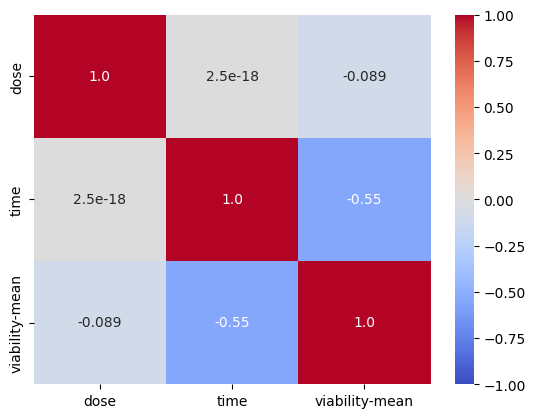

In [ ]:
matrix32 = df.loc[df['flavonoid']=='Quercetin', ['dose', 'time', 'viability-mean']].corr()

text32 = np.array([['', 'no\ncorrelation', 'weak\nnegative'],
 ['no\ncorrelation', '', 'strong\nnegative'],
 ['weak\nnegative', 'strong\nnegative', '']])

sns.heatmap(matrix32, annot=True, fmt=".2", vmin=-1, vmax=1, cmap="coolwarm")

<Axes: >

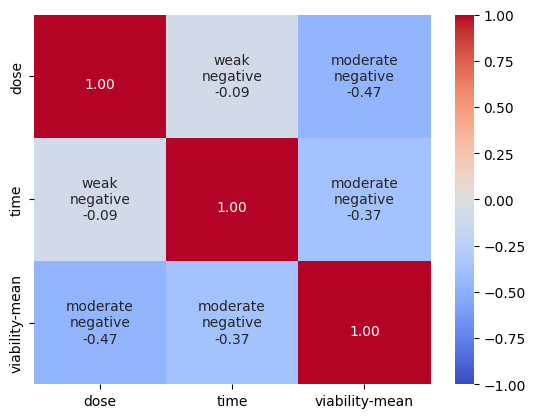

In [ ]:
matrix = df.loc[:, ['dose', 'time', 'viability-mean']].corr()

text = np.array([['', 'weak\nnegative', 'moderate\nnegative'],
 ['weak\nnegative', '', 'moderate\nnegative'],
 ['moderate\nnegative', 'moderate\nnegative', '']])

matrix_arr = np.array(matrix)

formatted_text = (np.asarray(["{0}\n{1:.2f}".format(text, matrix) for text, matrix
                                in zip(text.flatten(), matrix_arr.flatten())])).reshape(3, 3)

sns.heatmap(matrix, annot=formatted_text, fmt="", vmin=-1, vmax=1, cmap="coolwarm")

Text(0.5, 1.0, 'All Flavonoids')

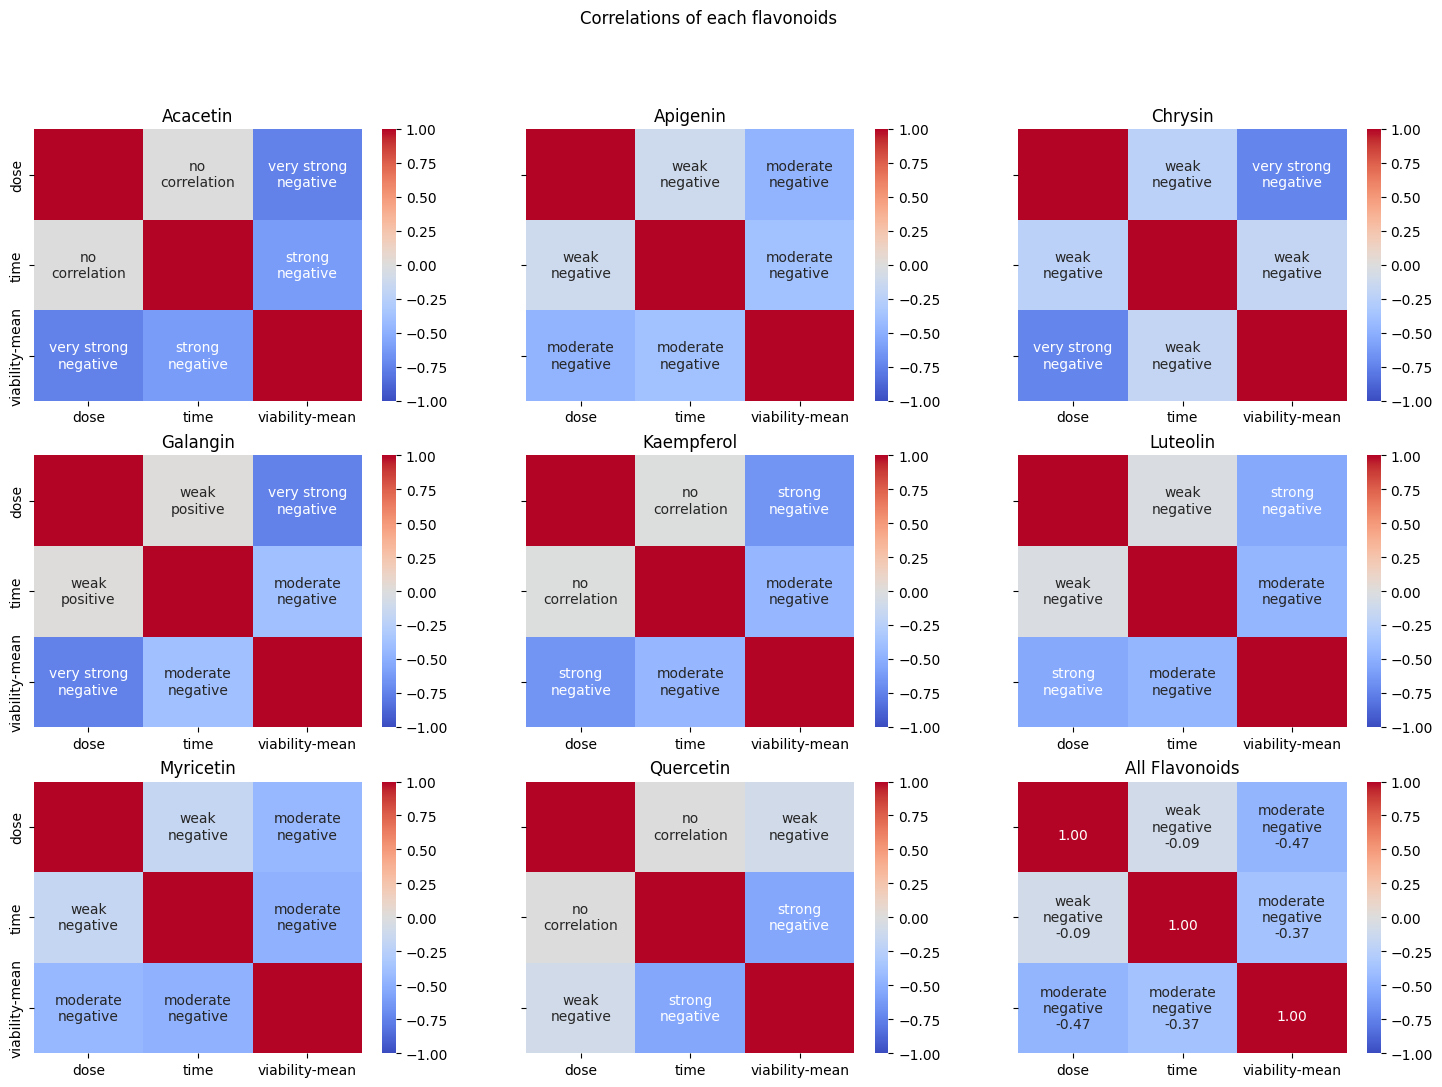

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
fig.suptitle('Correlations of each flavonoids')

sns.heatmap(matrix11, annot=text11, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title('Acacetin')

sns.heatmap(matrix12, annot=text12, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title('Apigenin')

sns.heatmap(matrix13, annot=text13, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[0, 2])
axes[0, 2].set_title('Chrysin')

sns.heatmap(matrix21, annot=text21, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title('Galangin')

sns.heatmap(matrix22, annot=text22, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('Kaempferol')

sns.heatmap(matrix23, annot=text23, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[1, 2])
axes[1, 2].set_title('Luteolin')

sns.heatmap(matrix31, annot=text31, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[2, 0])
axes[2, 0].set_title('Myricetin')

sns.heatmap(matrix32, annot=text32, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title('Quercetin')

sns.heatmap(matrix, annot=formatted_text, fmt="", vmin=-1, vmax=1, cmap="coolwarm", ax=axes[2, 2])
axes[2, 2].set_title('All Flavonoids')


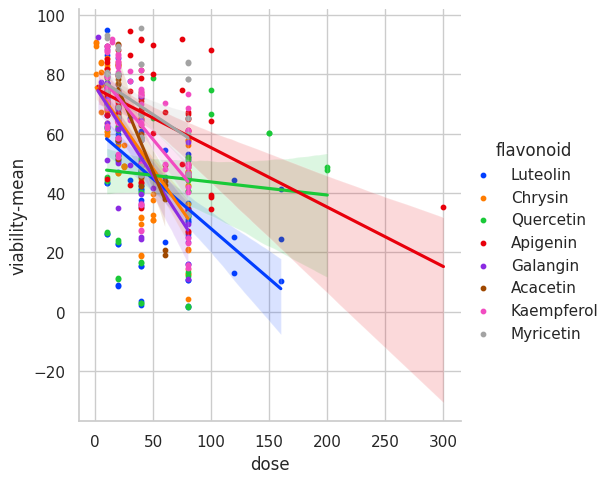

In [ ]:
sns.set(style="whitegrid") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavonoid", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


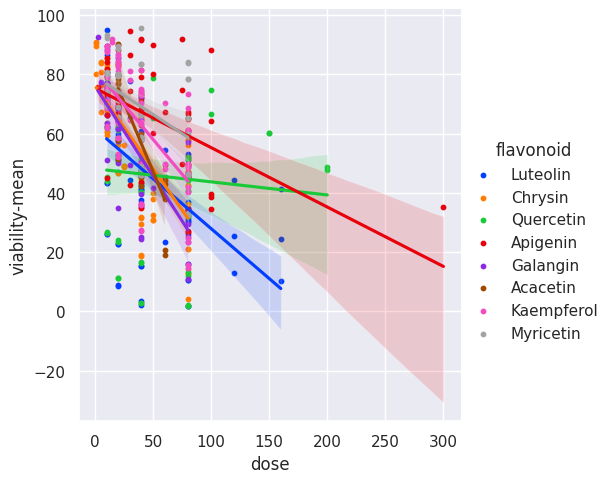

In [ ]:
sns.set_theme(rc={'figure.figsize':(7,5)})
sns.set(style="darkgrid") #, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavonoid", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


In [ ]:
dtr = DecisionTreeRegressor()

efs = EFS(dtr, min_features=1, max_features=2, scoring='r2', print_progress=True, cv=5)
efs = efs.fit(X, y)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
print(efs.subsets_[0],'\n',efs.subsets_[1])
#efs.subsets_

Features: 210/210

Best accuracy score:  0.3397373711944995
Best subset (indices): (0, 1)
Best subset (corresponding names): ('time', 'dose')
{'feature_idx': (0,), 'cv_scores': array([ 0.02466742,  0.08275531,  0.18132886, -0.12630324,  0.0672995 ]), 'avg_score': np.float64(0.04594956975442628), 'feature_names': ('time',)} 
 {'feature_idx': (1,), 'cv_scores': array([ 0.12787343,  0.24138486,  0.27332253, -0.02973756,  0.08175522]), 'avg_score': np.float64(0.1389196974171606), 'feature_names': ('dose',)}


In [ ]:
#flavonoid
s = 0.0
for i in range (2,10):
  print(efs.subsets_[i]['feature_names'])
  s = s + efs.subsets_[i]['avg_score']
print(s/8)

('flavonoid_Acacetin',)
('flavonoid_Apigenin',)
('flavonoid_Chrysin',)
('flavonoid_Galangin',)
('flavonoid_Kaempferol',)
('flavonoid_Luteolin',)
('flavonoid_Myricetin',)
('flavonoid_Quercetin',)
-0.0999766649612458


In [ ]:
#cell_line
s = 0.0
for i in range (10,20):
  print(efs.subsets_[i]['feature_names'])
  s = s + efs.subsets_[i]['avg_score']
print(s/10)

('cell line_KYSE150',)
('cell line_KYSE30',)
('cell line_KYSE410',)
('cell line_KYSE450',)
('cell line_KYSE510',)
('cell line_OE19',)
('cell line_OE33',)
('cell line_TE-1',)
('cell line_TE-10',)
('cell line_YES2',)
-0.09282086880527793


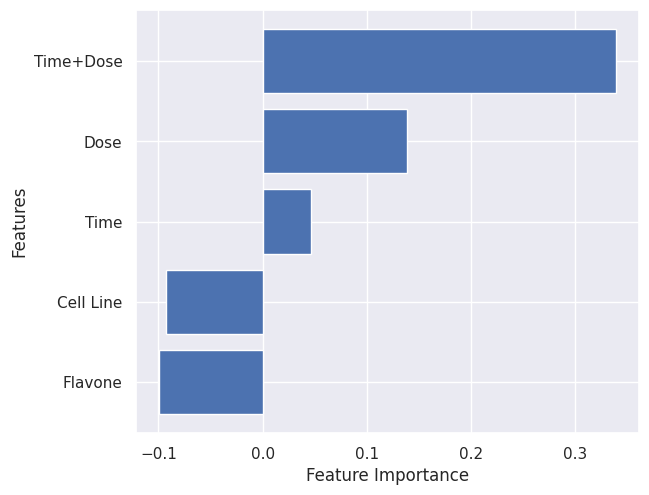

In [ ]:
y_for_bar=['Flavone', 'Cell Line', 'Time', 'Dose', 'Time+Dose']

# getting values against each value of y
x_for_bar=[-0.0999766649612458, -0.09282086880527793, 0.04594956975442628, 0.1389196974171606, 0.3397373711944995]
plt.figure(figsize=(6.5, 5.5))
plt.barh(y_for_bar, x_for_bar)

# setting label of y-axis
plt.ylabel("Features")

# setting label of x-axis
plt.xlabel("Feature Importance")
#plt.title("Horizontal bar graph")
#plt.grid(axis='x')
plt.show()

## Simple Model


In [ ]:
X_simple = X[['time', 'dose']]
X_simple

time   dose
0      48   10.0
1      48   20.0
2      48   40.0
3      48   80.0
4      72   10.0
..    ...    ...
479    24   20.0
480    24   40.0
481    24   60.0
482    24   80.0
483    24  100.0

[484 rows x 2 columns]

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X_simple, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

CPU times: user 15.2 s, sys: 81.1 ms, total: 15.3 s
Wall time: 23.2 s
{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
0.8305412371134022


In [ ]:
param_lo = {'penalty': ['l1', 'l2'],
            'C': [2**_ for _ in range(-15,11)],
            'solver': ['liblinear']}

gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X_simple, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 2.08 s, sys: 11.8 ms, total: 2.09 s
Wall time: 2.89 s
{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
0.814024914089347


In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,11)],
            'gamma': [2**_ for _ in range(-15,11)]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_simple, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

CPU times: user 49 s, sys: 153 ms, total: 49.1 s
Wall time: 1min
{'C': 2, 'gamma': 0.0009765625, 'kernel': 'rbf'}
0.8346649484536084


In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['best'],
         'max_depth': range(1, 21),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [2]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X_simple, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)


CPU times: user 1.68 s, sys: 12 ms, total: 1.7 s
Wall time: 2.95 s
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}
0.824355670103093


In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 21),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [2]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_simple, y01)
print(gs_rf.best_params_)
print(gs_rf.best_score_)


CPU times: user 6min 47s, sys: 2.76 s, total: 6min 50s
Wall time: 7min 9s
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15, 'random_state': 2}
0.826417525773196


In [ ]:
param_ad = {'n_estimators': range(5, 105, 5),
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000, 10000]}
gs_ad = GridSearchCV(ada, param_ad, cv=5, scoring='accuracy')
%time gs_ad.fit(X_simple, y01)
print(gs_ad.best_params_)
print(gs_ad.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packa

CPU times: user 1min 23s, sys: 542 ms, total: 1min 23s
Wall time: 1min 32s
{'learning_rate': 1, 'n_estimators': 10}
0.826417525773196


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 0, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: Sample weights have reached infinite values, at iteration 0, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.11/dist-packa

In [ ]:
param_xg = {'n_estimators': range(5, 105, 5),
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000, 10000]}
gs_xg = GridSearchCV(xgb, param_xg, cv=5, scoring='accuracy')
%time gs_xg.fit(X_simple, y01)
print(gs_xg.best_params_)
print(gs_xg.best_score_)

CPU times: user 37.8 s, sys: 809 ms, total: 38.6 s
Wall time: 22.9 s
{'learning_rate': 0.1, 'n_estimators': 85}
0.8284793814432991


In [ ]:
#initialize

knc = KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='uniform')
lor = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
svc = SVC(C=2, gamma=0.0009765625, kernel='rbf')
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=2, splitter='best')
rfc = RandomForestClassifier(criterion='gini', max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=15, random_state=2)
ada = AdaBoostClassifier(learning_rate=1, n_estimators=10)
xgb = XGBClassifier(learning_rate=0.1, n_estimators=85)


In [ ]:
kf_knc = cross_val_score(knc, X_simple, y01, cv=kf, scoring='accuracy')
print(kf_knc.mean(), kf_knc.std())

0.8304553264604811 0.049615094212526044


In [ ]:
dt_knc = cross_val_score(dtc, X_simple, y01, cv=kf, scoring='accuracy')
print(dt_knc.mean(), dt_knc.std())

0.8201460481099657 0.0654213429578286


In [ ]:
#fit

knc.fit(X_simple, y01)
svc.fit(X_simple, y01)
lor.fit(X_simple, y01)
dtc.fit(X_simple, y01)
rfc.fit(X_simple, y01)
ada.fit(X_simple, y01)
xgb.fit(X_simple, y01)

# validation

knc_val = knc.predict(X_simple)
lor_val = lor.predict(X_simple)
svc_val = svc.predict(X_simple)
dtc_val = dtc.predict(X_simple)
rfc_val = rfc.predict(X_simple)
ada_val = ada.predict(X_simple)
xgb_val = xgb.predict(X_simple)


In [ ]:
# Evaluation

print("KNN : ", accuracy_score(y01, knc_val))
print("LoR : ", accuracy_score(y01, lor_val))#, "\t(Test): ", accuracy_score(y_test, lor_pred))
print("SVM : ", accuracy_score(y01, svc_val))#, "\t(Test): ", accuracy_score(y_test, svc_pred))
print("DT  : ", accuracy_score(y01, dtc_val))#, "\t(Test): ", accuracy_score(y_test, dtc_pred))
print("RF  : ", accuracy_score(y01, rfc_val))#, "\t(Test): ", accuracy_score(y_test, rfc_pred))
print("Ada : ", accuracy_score(y01, ada_val))
print("XGB : ", accuracy_score(y01, xgb_val))

KNN :  0.8553719008264463
LoR :  0.8161157024793388
SVM :  0.8553719008264463
DT  :  0.8553719008264463
RF  :  0.8491735537190083
Ada :  0.8347107438016529
XGB :  0.8491735537190083


In [ ]:
#fit

#knc.fit(X_test, y_test)
#svc.fit(X_test, y_test)
#lor.fit(X_test, y_test)
#dtc.fit(X_test, y_test)
#rfc.fit(X_test, y_test)
#ada.fit(X_test, y_test)
#xgb.fit(X_test, y_test)

# validation

knc_pred = knc.predict(X_test)
lor_pred = lor.predict(X_test)
svc_pred = svc.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)


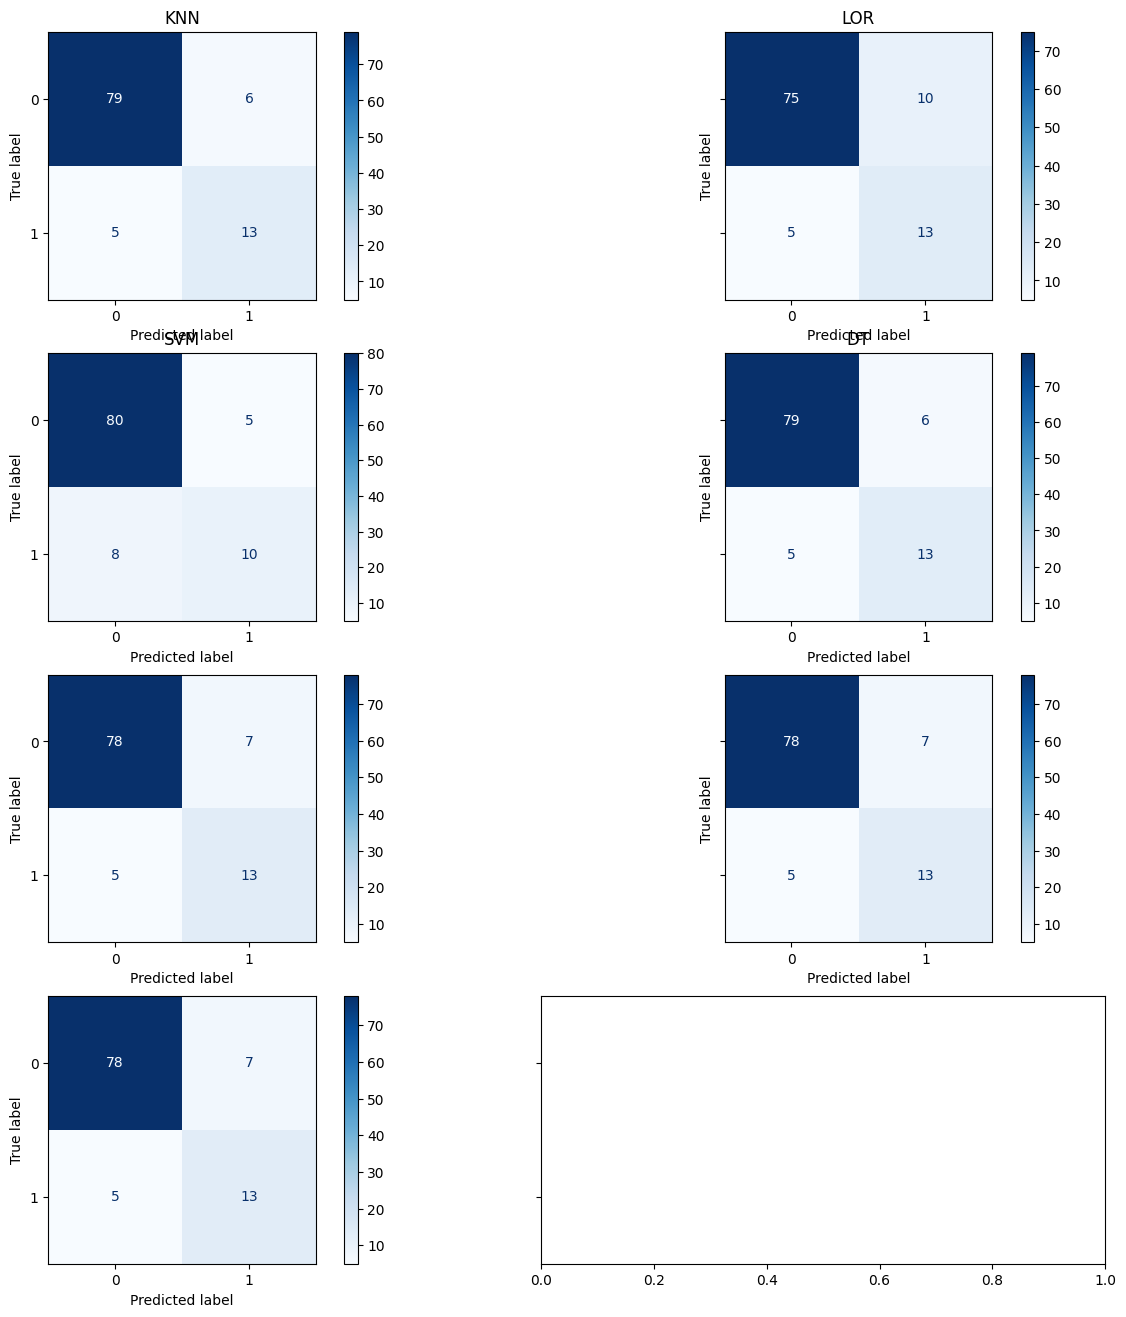

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16), sharey=True)
#fig.suptitle('Confusion Matrix')

cm_knc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, knc_pred))
cm_lor = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, lor_pred))
cm_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, svc_pred))
cm_dtc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dtc_pred))
cm_rfc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rfc_pred))
cm_ada = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ada_pred))
cm_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, xgb_pred))


axes[0, 0].set_title('KNN')
cm_knc.plot(cmap='Blues', ax=axes[0, 0])

axes[0, 1].set_title('LOR')
cm_lor.plot(cmap='Blues', ax=axes[1, 0])

axes[1, 0].set_title('SVM')
cm_svc.plot(cmap='Blues', ax=axes[0, 1])

axes[1, 1].set_title('DT')
cm_dtc.plot(cmap='Blues', ax=axes[1, 1])

#axes[2, 0].set_title('RF')
cm_rfc.plot(cmap='Blues', ax=axes[2, 0])

#axes[2, 1].set_title('Ada')
cm_ada.plot(cmap='Blues', ax=axes[2, 1])

#axes[3, 0].set_title('XGB')
cm_xgb.plot(cmap='Blues', ax=axes[3, 0])

plt.show()

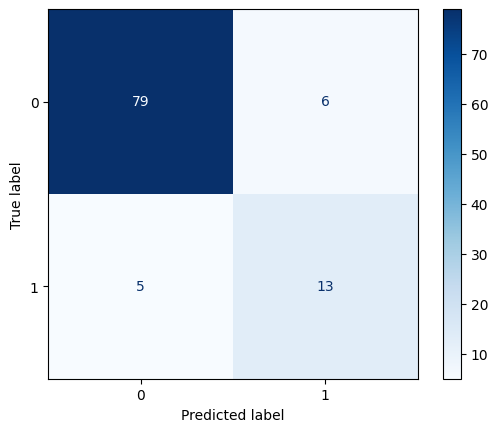

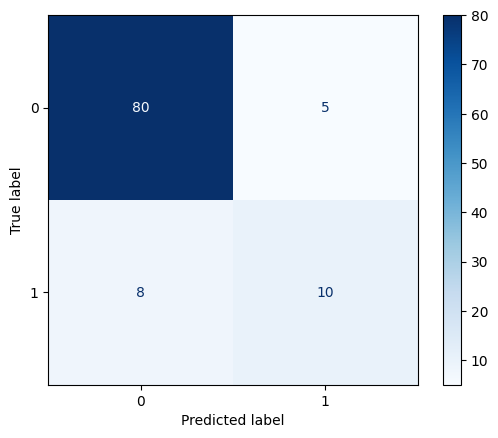

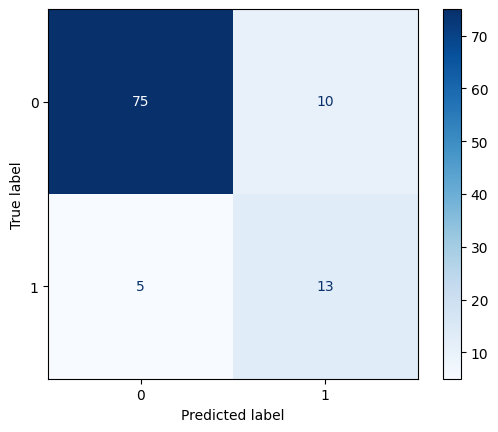

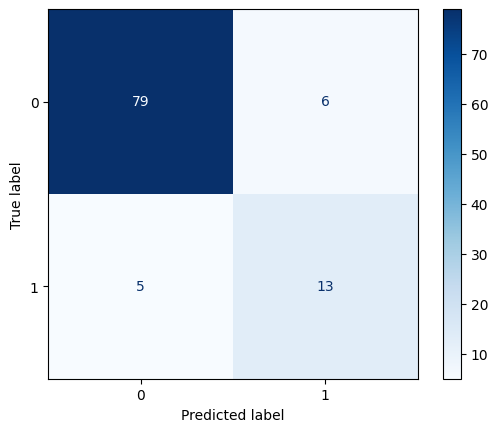

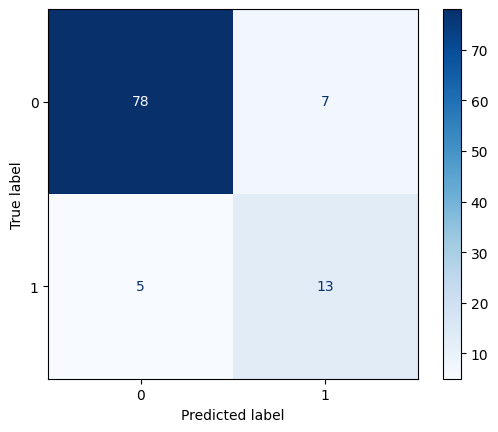

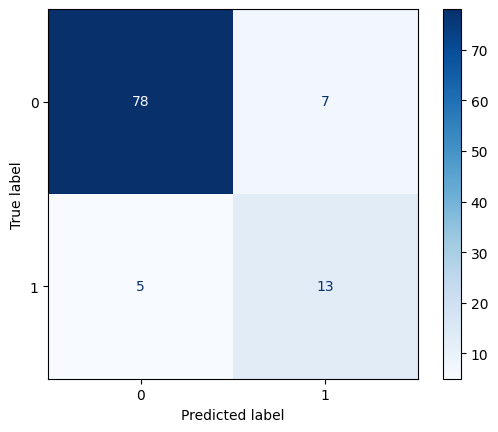

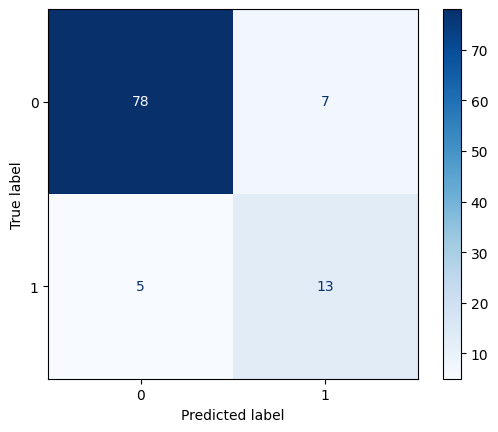

In [ ]:

cm_knc.plot(cmap='Blues')
cm_lor.plot(cmap='Blues')
cm_svc.plot(cmap='Blues')
cm_dtc.plot(cmap='Blues')
cm_rfc.plot(cmap='Blues')
cm_ada.plot(cmap='Blues')
cm_xgb.plot(cmap='Blues')

In [ ]:
print('KNN', classification_report(y_test, knc_pred))
print('LOR', classification_report(y_test, lor_pred))
print('SVM', classification_report(y_test, svc_pred))
print('DT', classification_report(y_test, dtc_pred))
print('RF', classification_report(y_test, rfc_pred))
print('Ada', classification_report(y_test, ada_pred))
print('XGB', classification_report(y_test, xgb_pred))


KNN               precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.68      0.72      0.70        18

    accuracy                           0.89       103
   macro avg       0.81      0.83      0.82       103
weighted avg       0.90      0.89      0.89       103

LOR               precision    recall  f1-score   support

           0       0.91      0.94      0.92        85
           1       0.67      0.56      0.61        18

    accuracy                           0.87       103
   macro avg       0.79      0.75      0.77       103
weighted avg       0.87      0.87      0.87       103

SVM               precision    recall  f1-score   support

           0       0.94      0.88      0.91        85
           1       0.57      0.72      0.63        18

    accuracy                           0.85       103
   macro avg       0.75      0.80      0.77       103
weighted avg       0.87      0.85      0.86       103

DT     

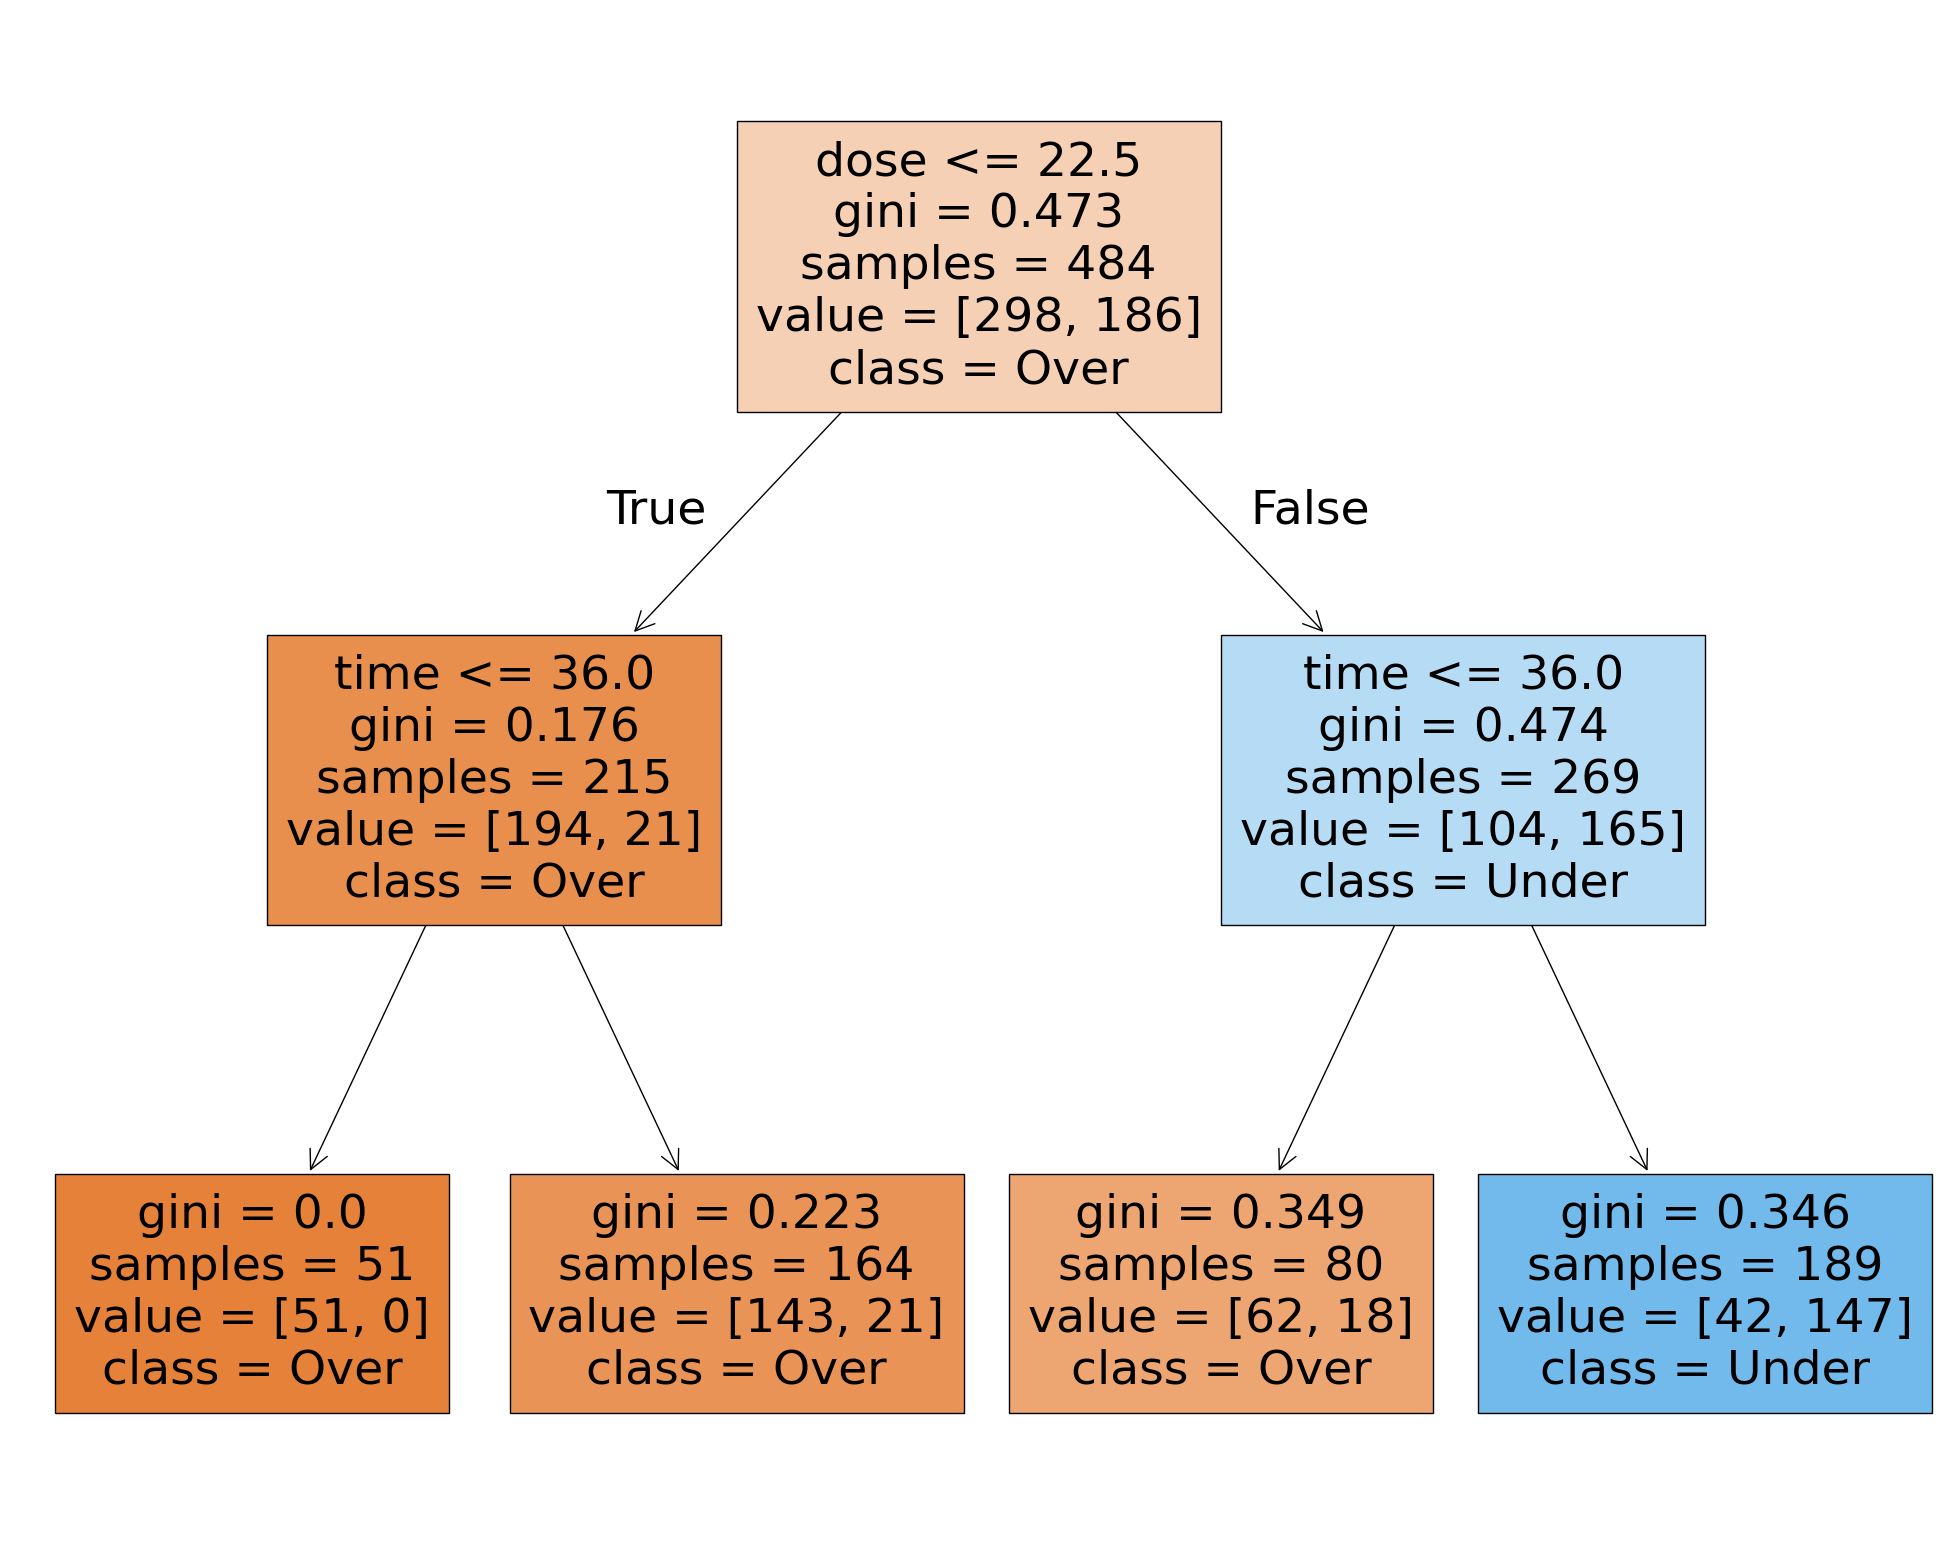

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=20, splitter='best')
dtc.fit(X_simple, y01)
#dtc_pred = dtc.predict(X)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=['time', 'dose'], class_names=['Over', 'Under'], filled=True)

In [ ]:
dtc_pred = dtc.predict(X_test)
accuracy_score(y_test, dtc_pred)

0.8737864077669902

In [ ]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        85
           1       0.62      0.72      0.67        18

    accuracy                           0.87       103
   macro avg       0.78      0.81      0.79       103
weighted avg       0.88      0.87      0.88       103



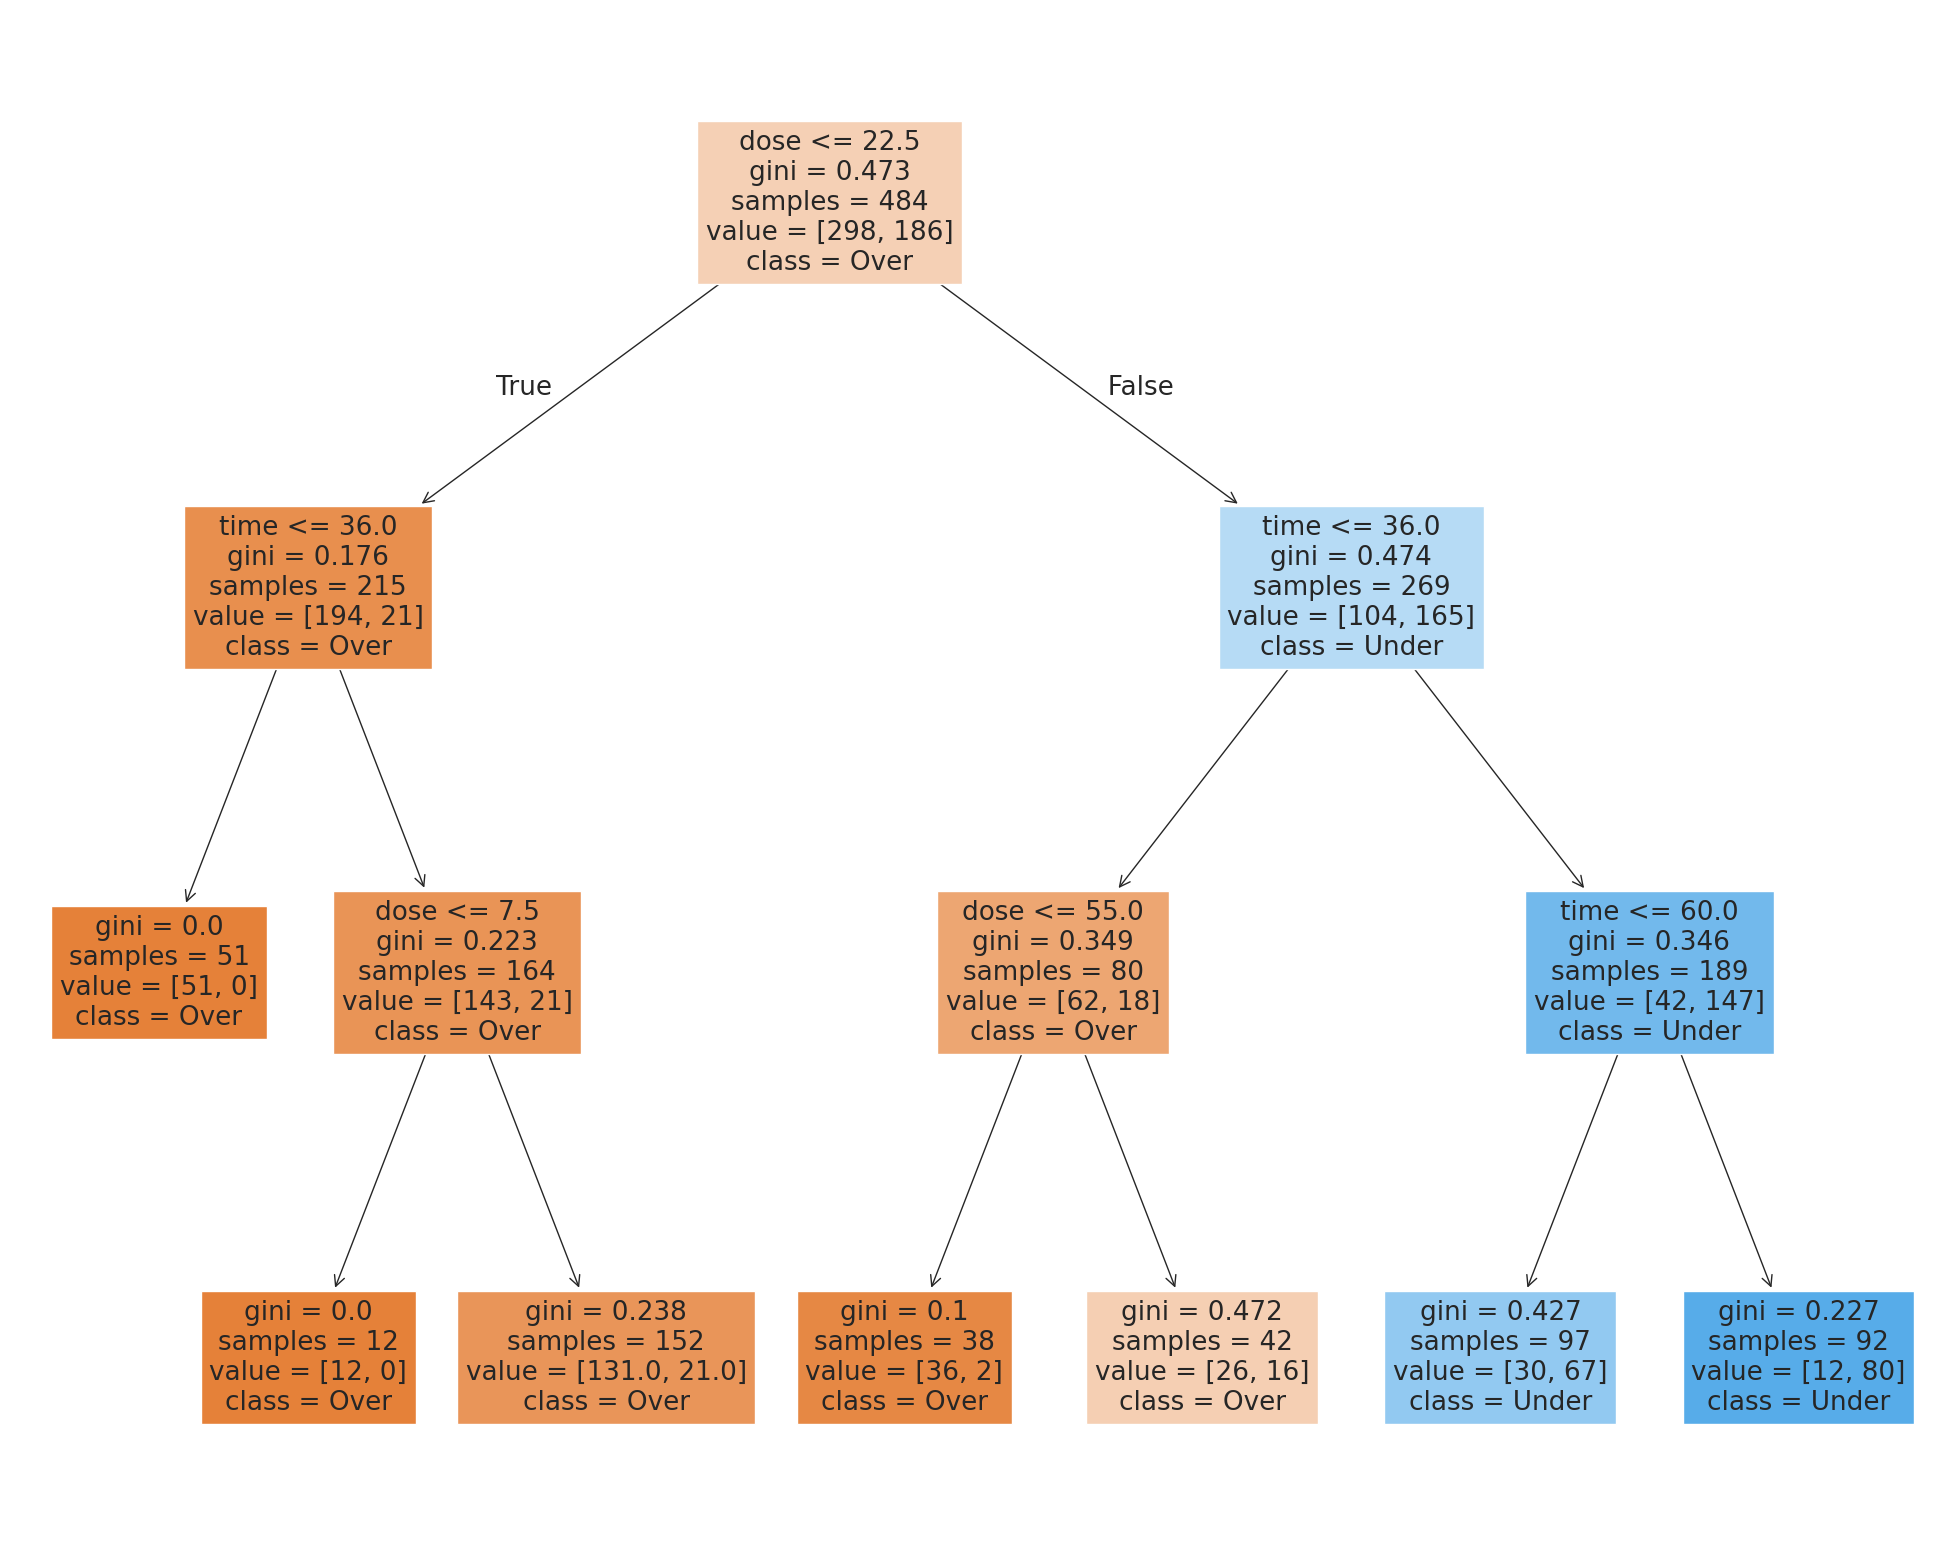

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=20, splitter='best')
dtc.fit(X_simple, y01)
#dtc_pred = dtc.predict(X)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=['time', 'dose'], class_names=['Over', 'Under'], filled=True)

In [ ]:
df

authors  flavonoid cell line  time  dose  viability-mean  \
0        Chen et al. 2017   Luteolin    KYSE30    48  10.0       77.272727   
1        Chen et al. 2017   Luteolin    KYSE30    48  20.0       67.613636   
2        Chen et al. 2017   Luteolin    KYSE30    48  40.0       47.159091   
3        Chen et al. 2017   Luteolin    KYSE30    48  80.0       32.386364   
4        Chen et al. 2017   Luteolin    KYSE30    72  10.0       69.886364   
..                    ...        ...       ...   ...   ...             ...   
582  Wang et al. 2011 (2)  Baicalein      OE33    48  80.0       48.551895   
583  Wang et al. 2011 (2)  Baicalein      OE33    72  10.0       82.833608   
584  Wang et al. 2011 (2)  Baicalein      OE33    72  20.0       71.960461   
585  Wang et al. 2011 (2)  Baicalein      OE33    72  40.0       49.540362   
586  Wang et al. 2011 (2)  Baicalein      OE33    72  80.0       48.237232   

     viability-error  viability-SD  viability-SE  
0          77.272727      0.001000           NaN  
1          67.613636      0.001000           NaN  
2          47.159091      0.001000           NaN  
3          32.386364      0.001000           NaN  
4          69.886364      0.001000           NaN  
..               ...           ...           ...  
582        58.912685     10.360791           NaN  
583        84.019769      1.186161           NaN  
584        74.728171      2.767710           NaN  
585        59.308072      9.767710           NaN  
586        48.237232      0.001000           NaN  

[587 rows x 9 columns]

In [ ]:
study_summary = df.groupby('authors').agg(
    n_samples=('viability-mean', 'size'),
    mean_viab=('viability-mean', 'mean'),
    sd_viab=('viability-mean', 'std'),
    median_viab=('viability-mean', 'median'),
    mean_dose=('dose', 'mean'),
    sd_dose=('dose', 'std'),
    mean_time=('time', 'mean'),
    sd_time=('time', 'std')
).reset_index()

In [ ]:
study_summary['cv_viab'] = 100 * study_summary['sd_viab'] / study_summary['mean_viab']
study_summary = study_summary.sort_values('mean_viab', ascending=False)
print(study_summary)


                  authors  n_samples  mean_viab    sd_viab  median_viab  \
13       Wang et al. 2018         30  86.615642   9.629371    90.135415   
2         Guo et al. 2022          4  81.115314  22.904056    87.142288   
10    Wang and Zheng 2016         15  76.928278  17.561421    84.360190   
16        Yao et al. 2016          8  71.892943  16.884982    74.118186   
12   Wang et al. 2011 (2)         43  67.944333  13.922054    71.842105   
5        Qiao et al. 2018         18  67.296273  15.854557    70.327004   
18      Zhang et al. 2008         71  63.950430  13.422614    65.454545   
21        Zhu et al. 2016          5  63.898089  21.090710    67.261146   
8         Ren et al. 2016          7  63.081633  18.552528    64.642857   
4          Li et al. 2023          8  62.875710  11.055151    62.844338   
1        Chen et al. 2021         24  62.679968  19.916270    65.454545   
17       Zang et al. 2014          6  62.511155  12.328892    63.939438   
3         Jia et al. 2021

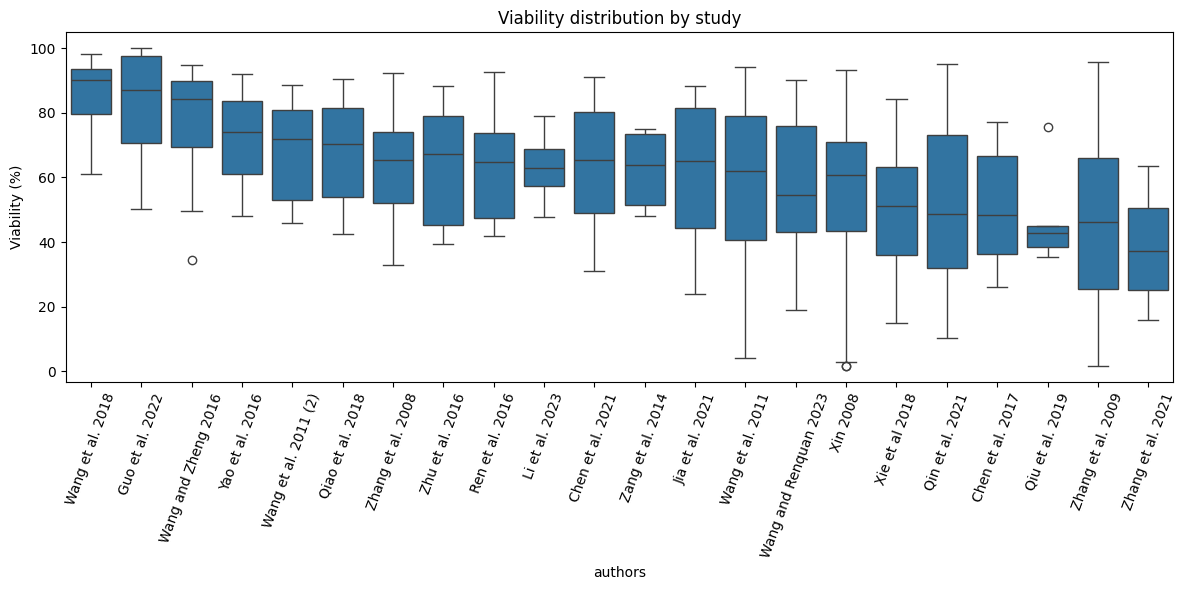

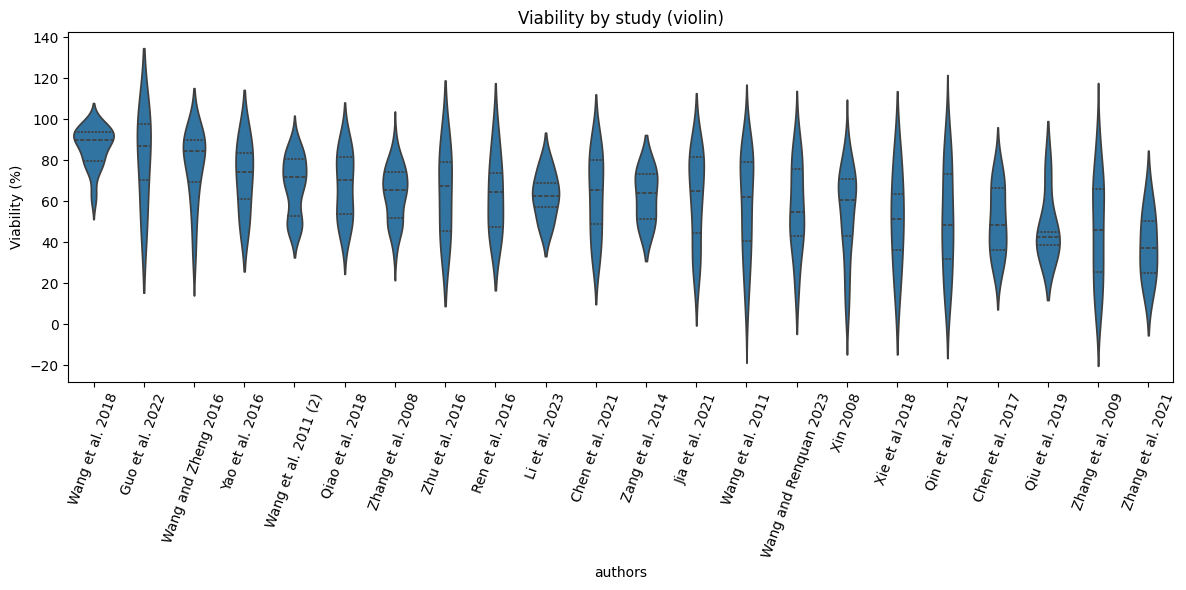

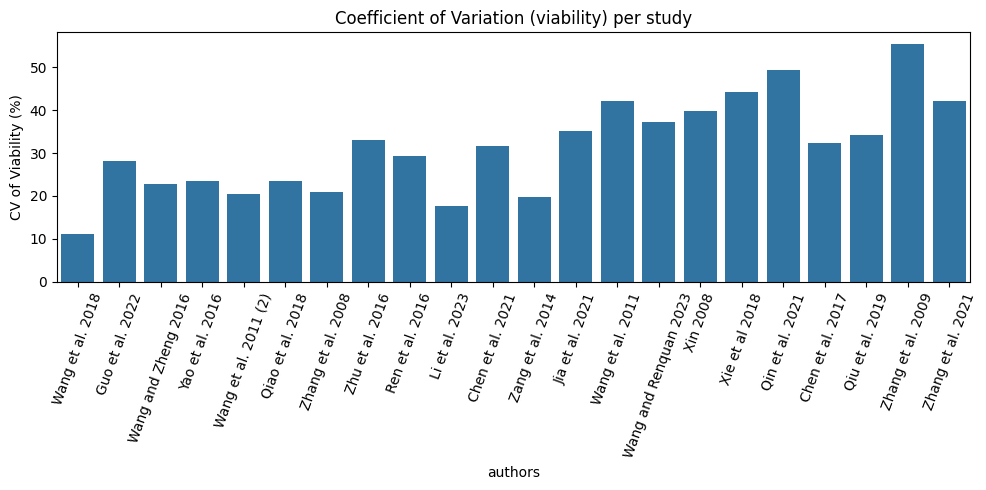

In [ ]:
# ---- 2. Visualizations ----
plt.figure(figsize=(12,6))
sns.boxplot(x='authors', y='viability-mean', data=df, order=study_summary['authors'])
plt.xticks(rotation=70)
plt.ylabel('Viability (%)')
plt.title('Viability distribution by study')
plt.tight_layout()
plt.show()
#plt.savefig('fig_viability_by_study_boxplot.png', dpi=300)

plt.figure(figsize=(12,6))
sns.violinplot(x='authors', y='viability-mean', data=df, order=study_summary['authors'], inner='quartile')
plt.xticks(rotation=70)
plt.ylabel('Viability (%)')
plt.title('Viability by study (violin)')
plt.tight_layout()
plt.show()
#plt.savefig('fig_viability_by_study_violin.png', dpi=300)

plt.figure(figsize=(10,5))
sns.barplot(x='authors', y='cv_viab', data=study_summary)
plt.xticks(rotation=70)
plt.ylabel('CV of Viability (%)')
plt.title('Coefficient of Variation (viability) per study')
plt.tight_layout()
plt.show()
#plt.savefig('fig_cv_by_study.png', dpi=300)



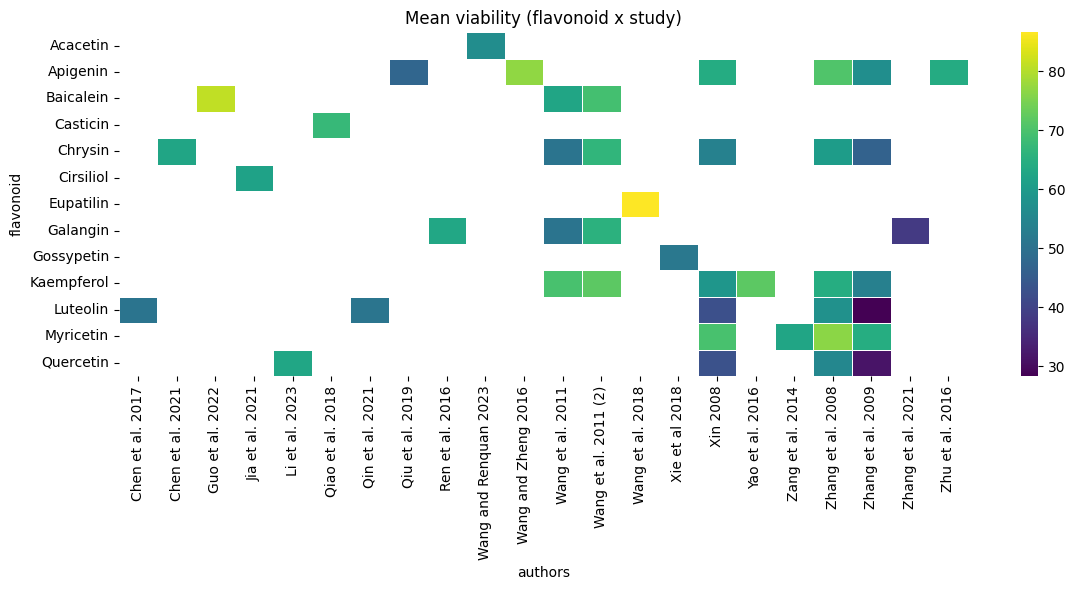

In [ ]:
# Heatmap of mean viability per (study x flavone) to see patterns
pivot = df.pivot_table(index='flavonoid', columns='authors', values='viability-mean', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=False, cmap='viridis', linewidths=.5)
plt.title('Mean viability (flavonoid x study)')
plt.tight_layout()
plt.show()
#plt.savefig('fig_heatmap_flavone_study.png', dpi=300)



In [ ]:
# ---- 3. Test for between-study differences ----
# Check normality of residuals per group; if many groups non-normal -> Kruskal-Wallis
# Simple one-way ANOVA (study as factor) for viability
#anova_model = ols('viability-mean ~ C(authors)', data=df).fit()
#anova_table = statsmodels.stats.anova.anova_lm(anova_model, typ=2)
#print(anova_table)

# If assumptions violated, run Kruskal-Wallis:
groups = [grp['viability-mean'].values for name, grp in df.groupby('authors')]
kw = stats.kruskal(*groups)
print('Kruskal-Wallis H-test:', kw)

# ---- 4. Mixed-effects model: estimate variance components ----
# We'll model viability as function of dose and time with random intercept by study
formula = 'viability-mean ~ dose + time'
md = mixedlm(formula, df, groups=df['authors'])
mdf = md.fit(reml=True)
print(mdf.summary())

# Extract variance components
var_study = float(mdf.cov_re.iloc[0,0])      # between-study variance (random intercept)
var_resid = float(mdf.scale)                # residual variance (within-study)
icc = var_study / (var_study + var_resid)
print(f'Between-study var: {var_study:.4f}, Residual var: {var_resid:.4f}, ICC: {icc:.3f}')



Kruskal-Wallis H-test: KruskalResult(statistic=np.float64(59.71451635158222), pvalue=np.float64(5.846230519146838e-07))


PatsyError: Error evaluating factor: NameError: name 'viability' is not defined
    viability-mean ~ dose + time
    ^^^^^^^^^

In [ ]:
# ---- 5. Leave-one-study-out CV for a simple model (e.g., Decision Tree or Logistic) ----
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Example: convert viability into binary using 50% (replicate your workflow). You may also run regression.
data['label'] = (data['viability_pct'] <= 50).astype(int)  # 1 = low viability

loso_results = []
studies = data['study_id'].unique()
for s in studies:
    train = data[data['study_id'] != s]
    test = data[data['study_id'] == s]
    if len(test) < 5:  # skip tiny left-out studies if you want
        continue
    X_train = train[['dose_uM','time_h']]
    X_test = test[['dose_uM','time_h']]
    y_train = train['label']
    y_test = test['label']
    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    clf = DecisionTreeClassifier(max_depth=5, random_state=0)
    clf.fit(X_train_s, y_train)
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    loso_results.append({'left_out': s, 'n_test': len(test), 'accuracy': acc})
loso_df = pd.DataFrame(loso_results)
print(loso_df)
print('LOSO mean accuracy:', loso_df['accuracy'].mean())
